In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import scipy
# Definir o estilo globalmente
plt.style.use('seaborn')

# Feature : Description #

**Campaign 1**: Accepted if the customer accepted the offer in the 1st campaing, Rejected otherwise;

**Campaign 2**: Accepted if the customer accepted the offer in the 2nd campaing, Rejected otherwise;


**Campaign 3**: Accepted if the customer accepted the offer in the 3rd campaing, Rejected otherwise;


**Campaign 4**: Accepted if the customer accepted the offer in the 4th campaing, Rejected otherwise;


**Campaign 5**: Accepted if the customer accepted the offer in the 5th campaing, Rejected otherwise;


**Campaign 6** : Accepted if the customer accepted the offer in the 6th campaing, Rejected otherwise;


**Complain** : 1 if the customer complained in the last 2 years;

**Customer_Days** : Days since customer enrollment with the company;

**Education** : customer's level of education;

**Marital** : customer's marital status;

**Kidhome** : number of small children in customer's household;

**Teenhome** : number of teenagers children in customer's household;

**Income** : customer's yearly household income;

**MntFishProducts** : amount spent on fish products in the last 2 years;

**MntMeatProducts** : amount spent on meat products in the last 2 years;

**MntFruit** : amount spent on fruit products in the last 2 years;

**MntSweetProducts** : amount spent on sweet products in the last 2 years;

**MntWines** : amount spent on wines products in the last 2 years;

**MntGoldProds** : amount spent on gold products in the last 2 years;

**NumDealsPurchases** : number of purchases made with discount;

**NumCatalogPurchases** : number of purchases made using catalogue;

**NumStorePurchases** : number of purchases made drectly in stores;

**NumWebPurchases** : number of purchases made through company's web site;

**NumWebVisitsMonth** : number of visits to company's web site in the last
month;

**Recency** : number of days since the last purchase;

In [4]:
df=pd.read_csv(r"/content/partialdf_ifood.csv")
df

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2200              182               42               118           247  ...   
2201               30                0                 0             8  ...   
2202              217               32                12            24  ...   
2203              214               80                30            61  ...   
2204               61                2                 1            21  ...   

      AcceptedCmp2  Complain  Response  Age  Customer_Days  MntTotal  \
0                0         0         1   63           2822      1529   
1                0         0         0   66           2272        21   
2                0         0         0   55           2471       734   
3                0         0         0   36           2298        48   
4                0         0         0   39           2320       407   
...            ...       ...       ...  ...            ...       ...   
2200             0         0         0   53           2540      1094   
2201             0         0         0   74           2178       436   
2202             0         0         0   39           2314      1217   
2203             0         0         0   64           2315       782   
2204             0         0         1   66           2781       151   

      MntRegularProds  AcceptedCmpOverall     maritalStatus  \
0                1441                   0    marital_Single   
1                  15                   0    marital_Single   
2                 692                   0  marital_Together   
3                  43                   0  marital_Together   
4                 392                   0   marital_Married   
...               ...                 ...               ...   
2200              847                   0   marital_Married   
2201              428                   1  marital_Together   
2202             1193                   1  marital_Divorced   
2203              721                   0  marital_Together   
2204              130                   0   marital_Married   

            educationLevel  
0     education_Graduation  
1     education_Graduation  
2     education_Graduation  
3     education_Graduation  
4            education_PhD  
...                    ...  
2200  education_Graduation  
2201         education_PhD  
2202  education_Graduation  
2203      education_Master  
2204         education_PhD  

[2205 rows x 29 columns]

In [5]:
colors = ['#FEA500', '#EA0031', '#8A011B', '#FF94C2']

In [6]:
df['maritalStatus'] = df['maritalStatus'].str.replace('marital_','')

In [7]:
df['educationLevel'] = df['educationLevel'].str.replace('education_','')


### Data transformation ###

In [8]:
##original df transformations:

df.replace({
    'AcceptedCmp1': {1: 'Accepted', 0: 'Declined'},
    'AcceptedCmp2': {1: 'Accepted', 0: 'Declined'},
    'AcceptedCmp3': {1: 'Accepted', 0: 'Declined'},
    'AcceptedCmp4': {1: 'Accepted', 0: 'Declined'},
    'AcceptedCmp5': {1: 'Accepted', 0: 'Declined'},
    'Response'    : {1: 'Accepted', 0: 'Declined'},
    'Complain'    : {1: 'True', 0: 'False'}
    },inplace=True)

df.rename(columns={
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2':'Campaign 2',
    'AcceptedCmp3':'Campaign 3',
    'AcceptedCmp4':'Campaign 4',
    'AcceptedCmp5':'Campaign 5',
    'Response':'Campaign 6',
    },inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Teenhome             2205 non-null   int64  
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  NumWebVisitsMonth    2205 non-null   int64  
 15  Campaign 3           2205 non-null   o

# Univariate Analysis #

## Numerical variables ##

In [10]:
colunas_numericas = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Income', 'Recency',
                   'Age', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Kidhome', 'Teenhome', 'Customer_Days']
df_numerical = df[colunas_numericas]

### Histograms ###

array([[<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>],
       [<Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'MntTotal'}>,
        <Axes: title={'center': 'MntRegularProds'}>],
       [<Axes: title={'center': 'AcceptedCmpOverall'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Customer_

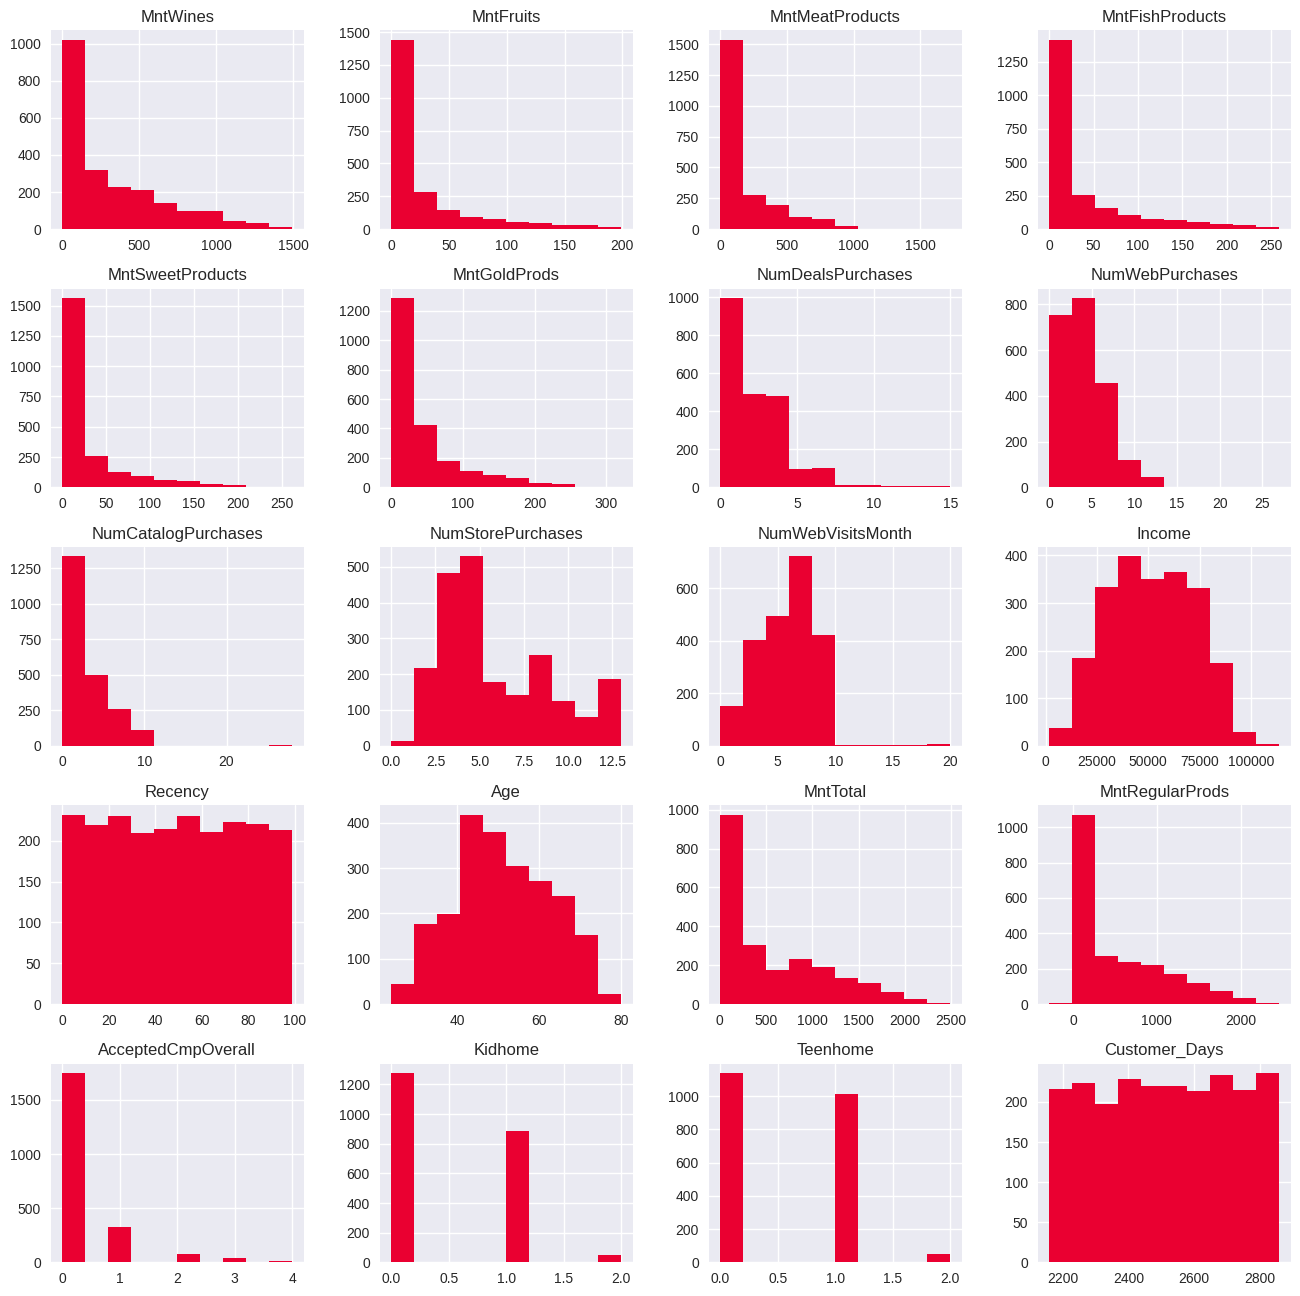

In [11]:
df_numerical.hist(figsize=(16,16), color = '#EA0031')

### Box-Plots ###

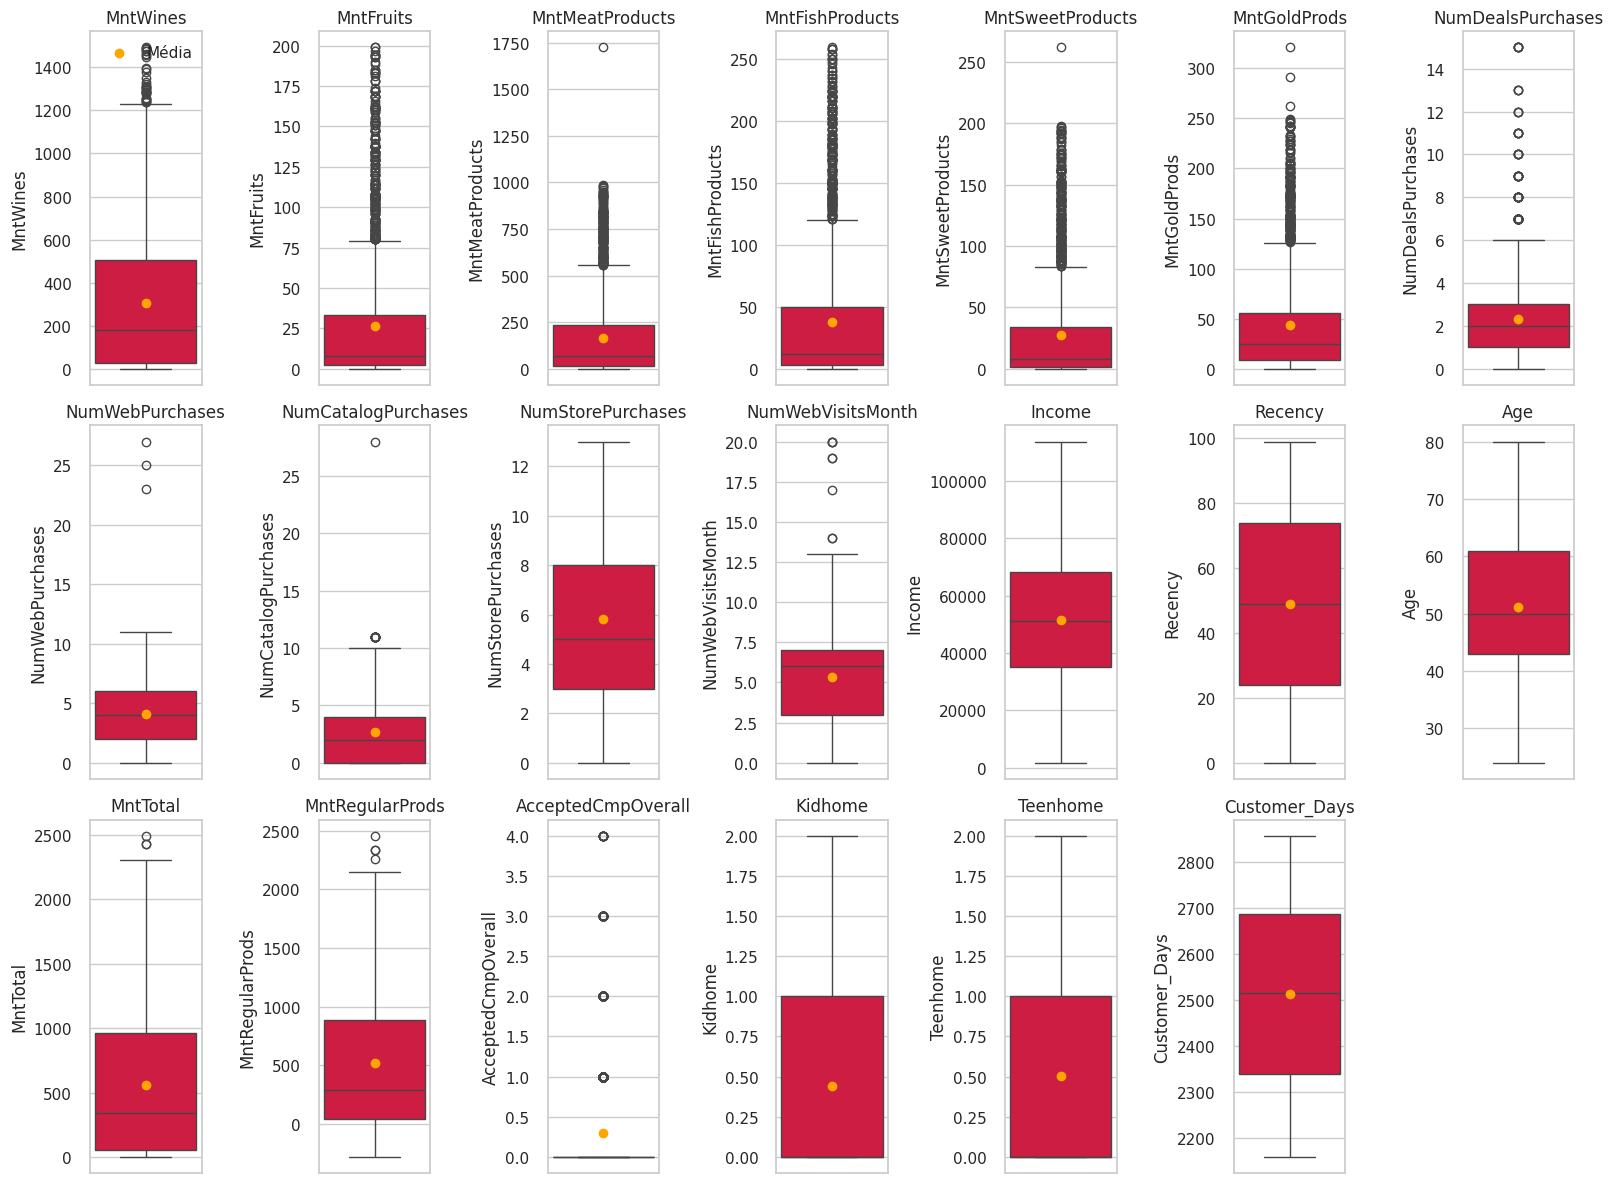

In [12]:
plt.figure(figsize=(16, 12))  # Ajuste o tamanho conforme necessário
sns.set(style="whitegrid")

# Calcula a média de todas as colunas numéricas uma única vez
means = df[colunas_numericas].mean()

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 7, i)  # Ajuste para a quantidade correta de subplots, 3 linhas e até 7 colunas aqui
    sns.boxplot(y=df[coluna], color='#EA0031')

    # Plotagem da média para a coluna atual
    # plt.scatter espera coordenadas x, y. Usamos '0' para x porque temos apenas uma categoria.
    plt.scatter(0, means[coluna], color='#FEA500', label='Média', zorder=5)
    plt.title(coluna)

    if i == 1:
        plt.legend(loc="upper left")
    plt.title(coluna)

plt.tight_layout()

plt.show()


### Statistics ###

In [13]:
def calc_statistics(df):

    # Central tendency and position statistics
    means = round(df.mean(), 3)  # Mean
    trimmed_means = round(df.apply(lambda x: stats.trim_mean(x, 0.05)), 3)  # Calculates trimmed mean, excluding the bottom and top 5%
    modes = df.mode().iloc[0]  # Mode. Since a column can have multiple modes, we take the first one.
    first_quartile = df.quantile(0.25)  # First quartile
    medians = df.median()  # Second quartile // median
    third_quartile = df.quantile(0.75)  # Third quartile

    # Dispersion statistics
    iqr = third_quartile - first_quartile  # Interquartile Range
    variance = round(df.var(), 3)  # Variance
    standard_deviation = round(df.std(), 3)  # Standard Deviation
    coefficient_variation = round((standard_deviation / means) * 100, 3) # Coefficient of Variation

    # Combines all the results into a new DataFrame
    statistics_df = pd.DataFrame({
        'Mean': means,
        'Trimmed Mean': trimmed_means,
        'Mode': modes,
        '1st Quartile': first_quartile,
        'Median': medians,
        '3rd Quartile': third_quartile,
        'IQR': iqr,
        'Variance': variance,
        'Standard Deviation': standard_deviation,
        'Coefficient of Variation (%)': coefficient_variation
    })

    return statistics_df


In [14]:
df_estatisticas = calc_statistics(df_numerical)

df_estatisticas


Mean  Trimmed Mean    Mode  1st Quartile   Median  \
MntWines               306.165       274.828     2.0          24.0    178.0   
MntFruits               26.403        20.809     0.0           2.0      8.0   
MntMeatProducts        165.312       138.323     7.0          16.0     68.0   
MntFishProducts         37.756        30.523     0.0           3.0     12.0   
MntSweetProducts        27.128        21.385     0.0           1.0      8.0   
MntGoldProds            44.057        37.787     3.0           9.0     25.0   
NumDealsPurchases        2.318         2.096     1.0           1.0      2.0   
NumWebPurchases          4.101         3.932     2.0           2.0      4.0   
NumCatalogPurchases      2.645         2.388     0.0           0.0      2.0   
NumStorePurchases        5.824         5.663     3.0           3.0      5.0   
NumWebVisitsMonth        5.337         5.346     7.0           3.0      6.0   
Income               51622.095     51630.889  7500.0       35196.0  51287.0   
Recency                 49.009        49.001    56.0          24.0     49.0   
Age                     51.096        51.071    44.0          43.0     50.0   
MntTotal               562.765       517.364    39.0          56.0    343.0   
MntRegularProds        518.707       472.892    16.0          42.0    288.0   
AcceptedCmpOverall       0.299         0.188     0.0           0.0      0.0   
Kidhome                  0.442         0.413     0.0           0.0      0.0   
Teenhome                 0.507         0.482     0.0           0.0      0.0   
Customer_Days         2512.718      2513.052  2826.0        2339.0   2515.0   

                     3rd Quartile      IQR      Variance  Standard Deviation  \
MntWines                    507.0    483.0  1.139021e+05             337.494   
MntFruits                    33.0     31.0  1.582805e+03              39.784   
MntMeatProducts             232.0    216.0  4.743009e+04             217.785   
MntFishProducts              50.0     47.0  3.005741e+03              54.825   
MntSweetProducts             34.0     33.0  1.691715e+03              41.130   
MntGoldProds                 56.0     47.0  2.676636e+03              51.736   
NumDealsPurchases             3.0      2.0  3.557000e+00               1.886   
NumWebPurchases               6.0      4.0  7.493000e+00               2.737   
NumCatalogPurchases           4.0      4.0  7.832000e+00               2.799   
NumStorePurchases             8.0      5.0  1.050900e+01               3.242   
NumWebVisitsMonth             7.0      4.0  5.825000e+00               2.414   
Income                    68281.0  33085.0  4.290310e+08           20713.064   
Recency                      74.0     50.0  8.370670e+02              28.932   
Age                          61.0     18.0  1.370260e+02              11.706   
MntTotal                    964.0    908.0  3.317033e+05             575.937   
MntRegularProds             884.0    842.0  3.067468e+05             553.847   
AcceptedCmpOverall            0.0      0.0  4.630000e-01               0.680   
Kidhome                       1.0      1.0  2.890000e-01               0.537   
Teenhome                      1.0      1.0  2.960000e-01               0.544   
Customer_Days              2688.0    349.0  4.103203e+04             202.564   

                     Coefficient of Variation (%)  
MntWines                                  110.233  
MntFruits                                 150.680  
MntMeatProducts                           131.742  
MntFishProducts                           145.209  
MntSweetProducts                          151.615  
MntGoldProds                              117.430  
NumDealsPurchases                          81.363  
NumWebPurchases                            66.740  
NumCatalogPurchases                       105.822  
NumStorePurchases                          55.666  
NumWebVisitsMonth                          45.231  
Income                                     40.124  
Recency  

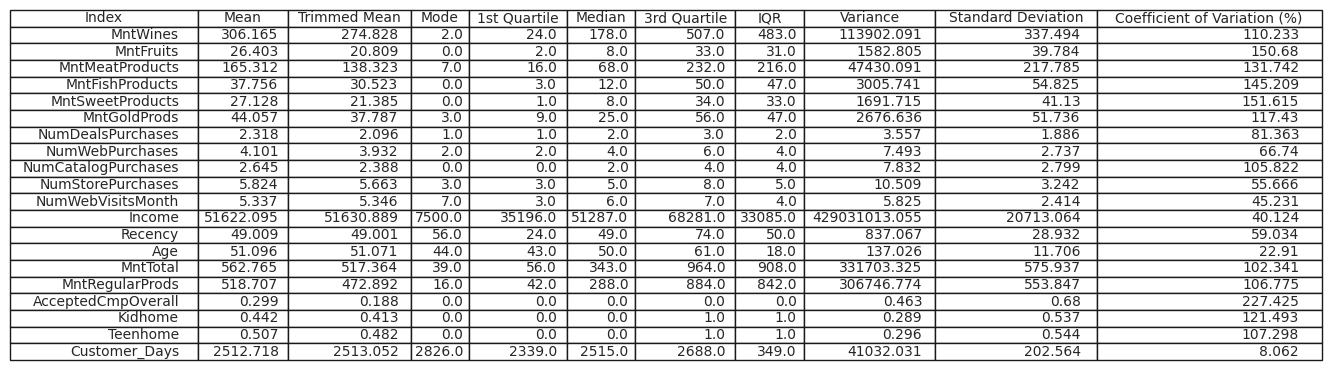

In [15]:
# Criar uma figura. Ajuste o tamanho conforme necessário
fig, ax = plt.subplots(figsize=(10, 4))  # Largura e altura da figura em polegadas

# Esconder os eixos
ax.axis('tight')
ax.axis('off')

# Preparar dados com índice incluído
data_with_index = df_estatisticas.reset_index().values  # Reset index para converter o índice em uma coluna
column_labels = ['Index'] + list(df_estatisticas.columns)  # Adiciona 'Index' à lista de rótulos de coluna

# Criar a tabela no gráfico
table = ax.table(cellText=data_with_index, colLabels=column_labels, loc='center')

# Ajustar o tamanho da fonte e largura das colunas conforme necessário
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(column_labels))))  # Ajusta a largura das colunas

# Salvar a imagem
plt.savefig("df_estatisticas_with_index.png", dpi=300, bbox_inches='tight')  # Ajuste a resolução conforme necessário

# Mostrar a imagem
plt.show()

### QQ plot ###

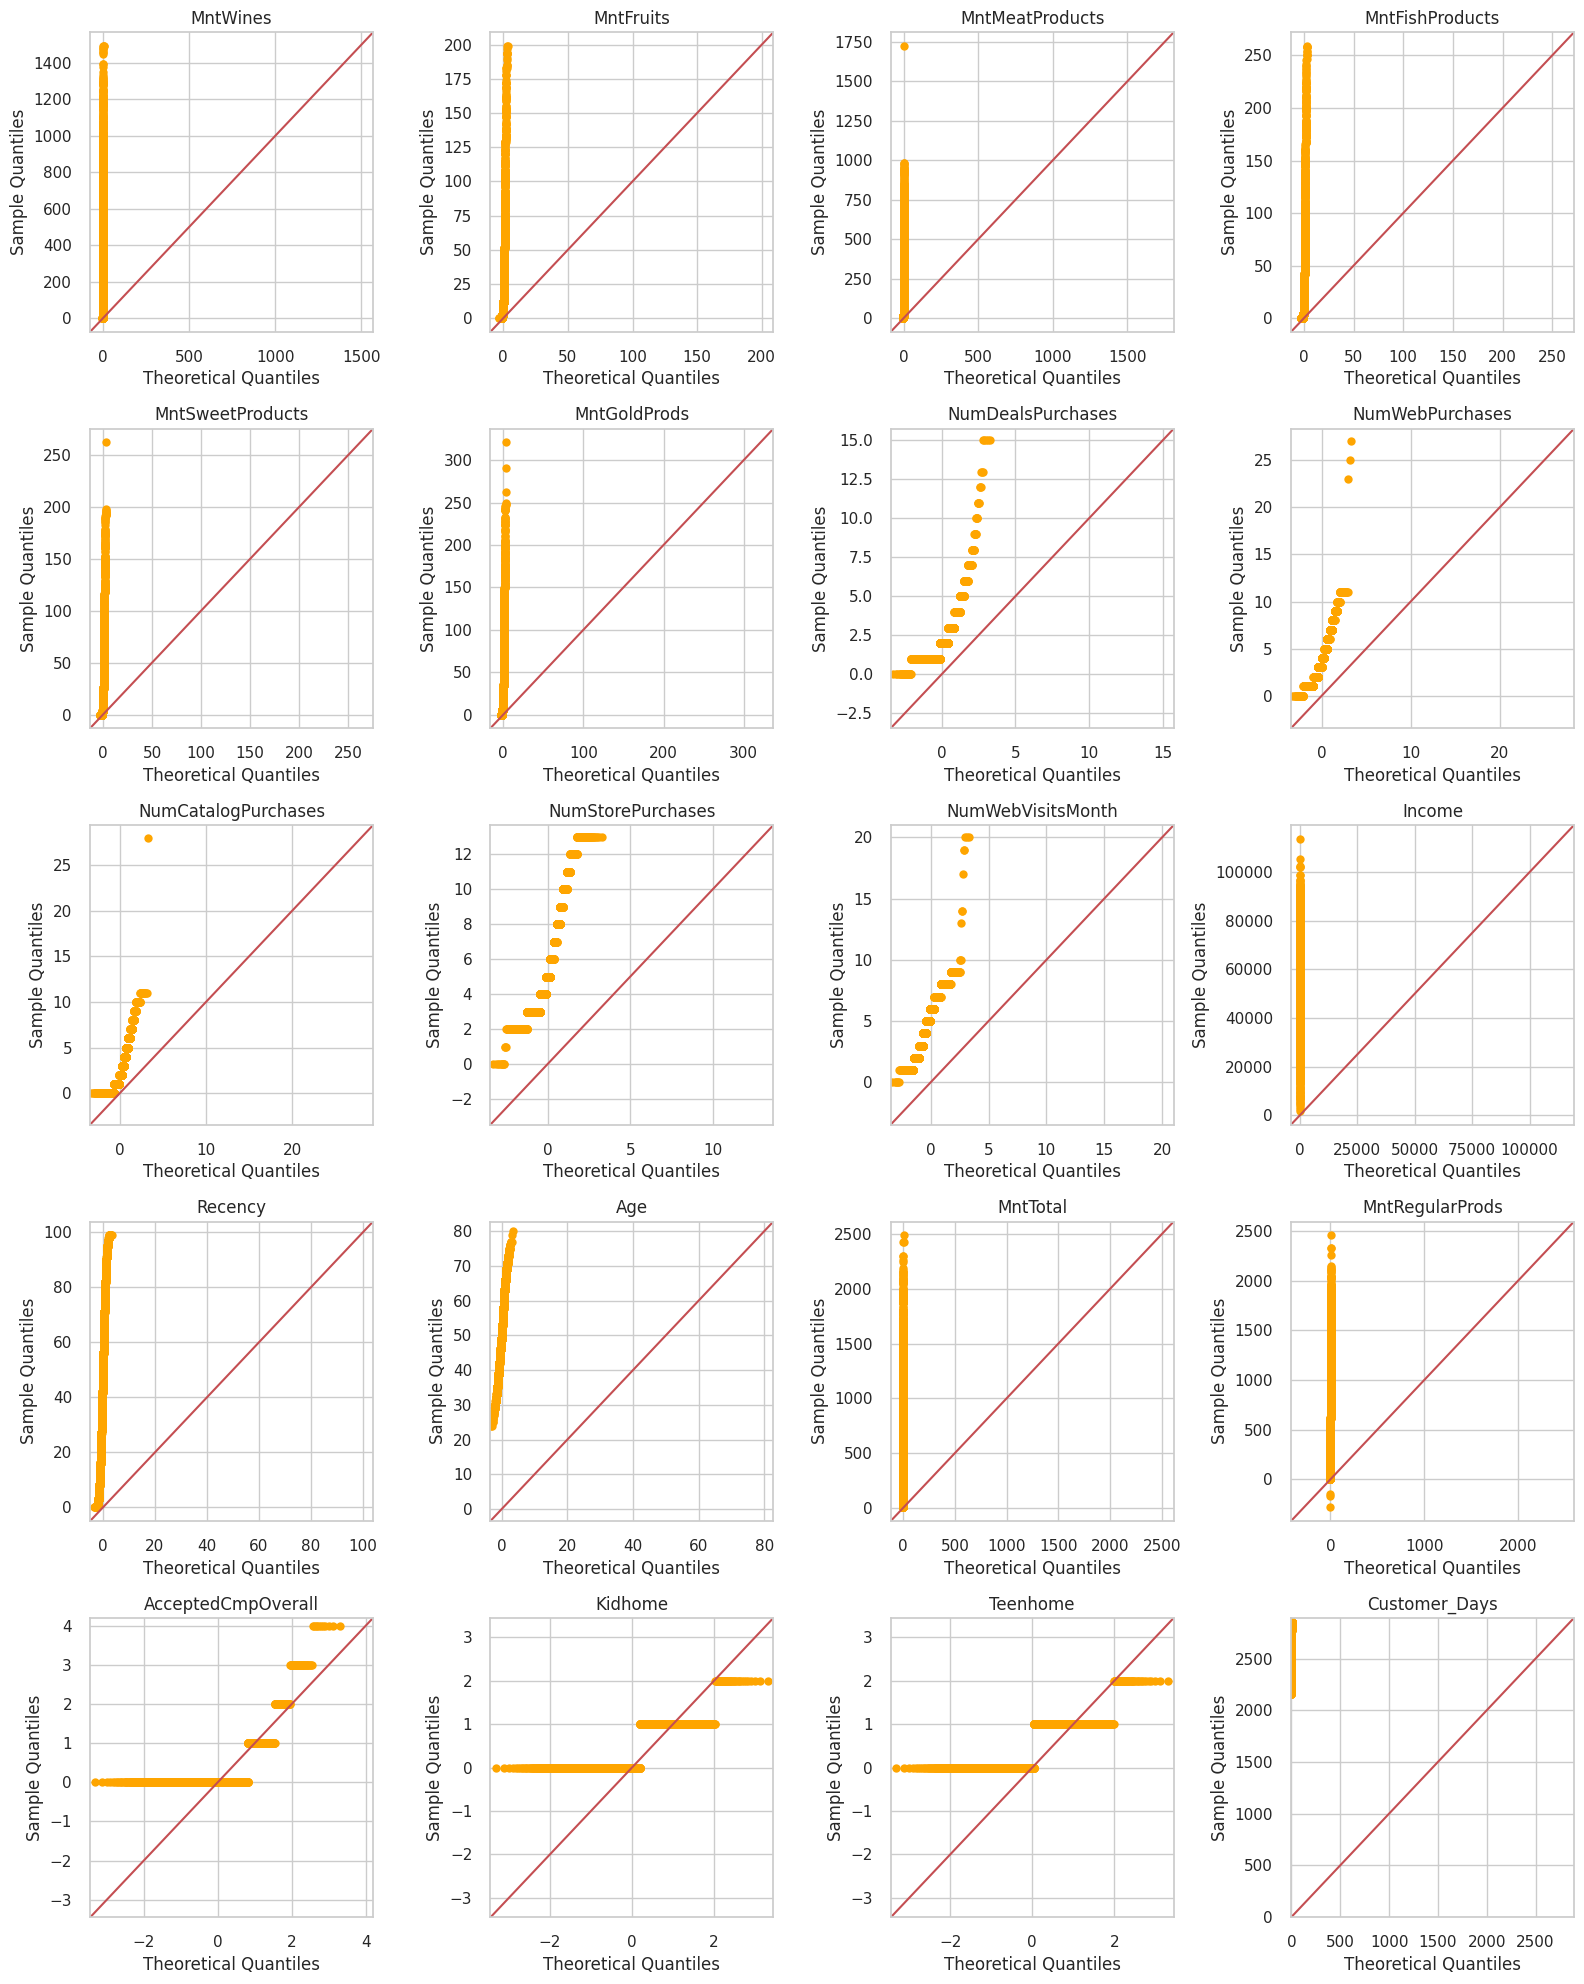

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Calcular o número de subplots necessários
num_cols = len(df_numerical.columns)
num_rows = (num_cols + 3) // 4

# Configurar o layout dos subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

axes = axes.flatten() if num_rows > 1 else [axes]

# Plotar QQ plots para as variáveis
for i, column in enumerate(df_numerical.columns):
    ax = axes[i]

    # Plotar QQ plot
    sm.qqplot(df_numerical[column], line ='45', ax=ax, marker='o', markeredgecolor='#FEA500', markerfacecolor='#FEA500')

    ax.set_title(column)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.grid(True)

# Remover eixos desnecessários
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


### Skewness and Kurtosis ###

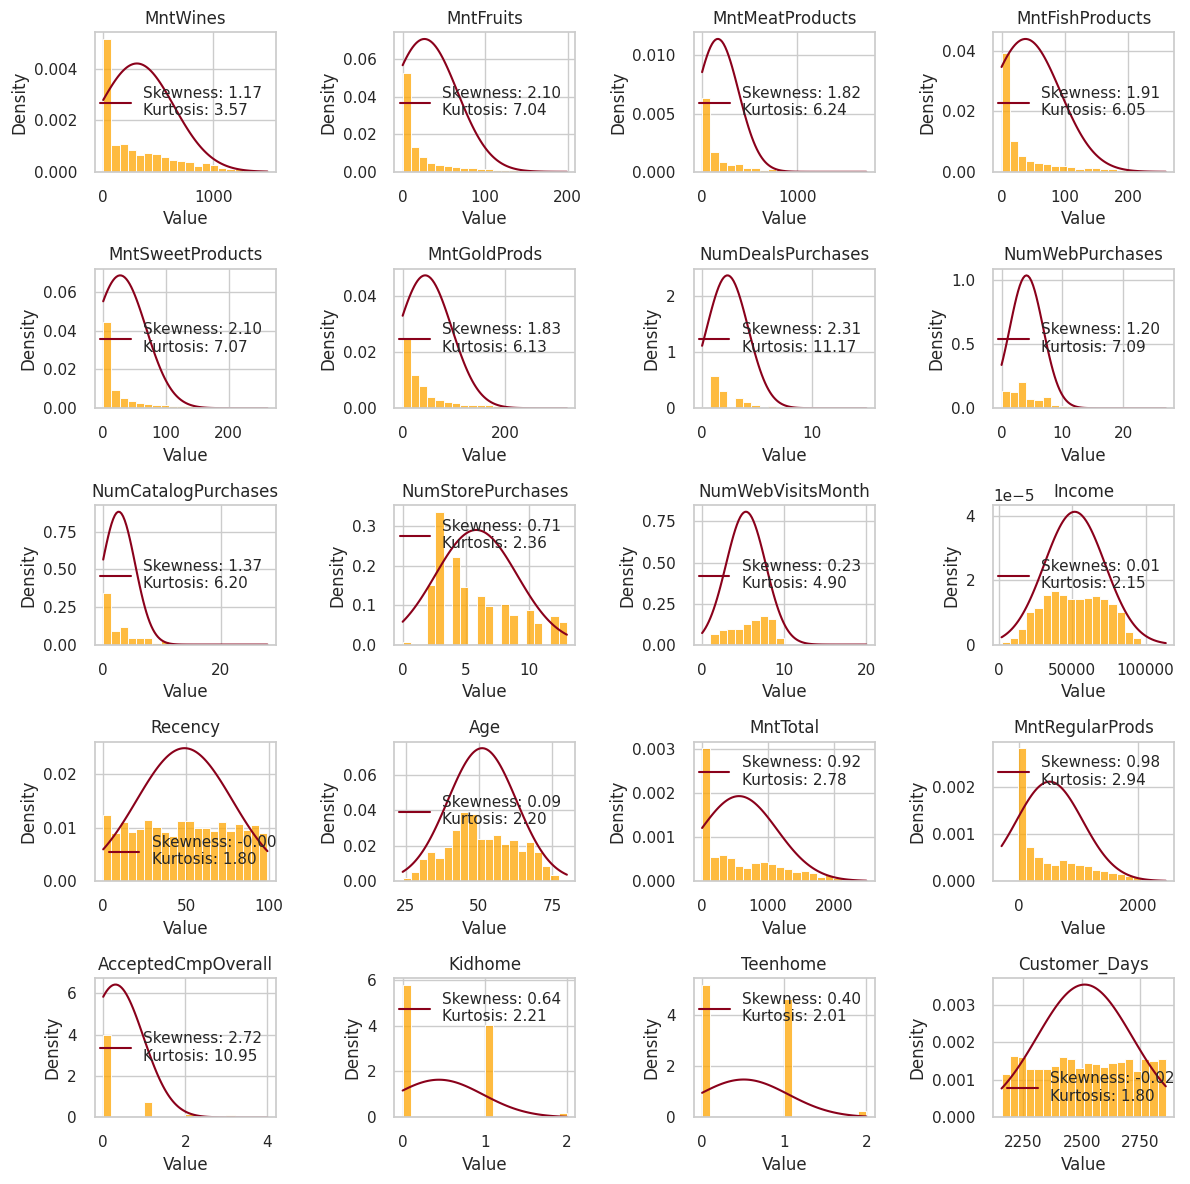

In [81]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis


# Calcular o número de subplots necessários
#num_cols = len(df_numerical.columns)
#num_rows = (num_cols + 3) // 4  # Arredondamento para cima

# Configurar o layout dos subplots
fig, axes = plt.subplots(5, 4, figsize=(12,12))

# Flattening the axes array if num_rows = 1
axes = axes.flatten() if num_rows > 1 else [axes]

# Plotar histogramas com curva sinoidal e valores de skewness e kurtosis
for i, column in enumerate(df_numerical.columns):
    ax = axes[i]

    # Plotar histograma
    sns.histplot(df_numerical[column], kde=False, color='#FEA500', stat='density', bins=20, ax=ax)

    # Calcular skewness e kurtosis
    skew = df_numerical[column].skew()
    kurt = kurtosis(df_numerical[column], fisher=False)

    # Gerar dados para a curva sinoidal
    x = np.linspace(df_numerical[column].min(), df_numerical[column].max(), 100)
    y = norm.pdf(x, df_numerical[column].mean(), df_numerical[column].std()) * kurt

    # Plotar a curva sinoidal
    ax.plot(x, y, label=f'Skewness: {skew:.2f}\nKurtosis: {kurt:.2f}', color='#8A011B')

    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)



#plt.delaxes(plt.subplot(3, 3, 7))

# Ajustar layout
plt.tight_layout()
plt.show()


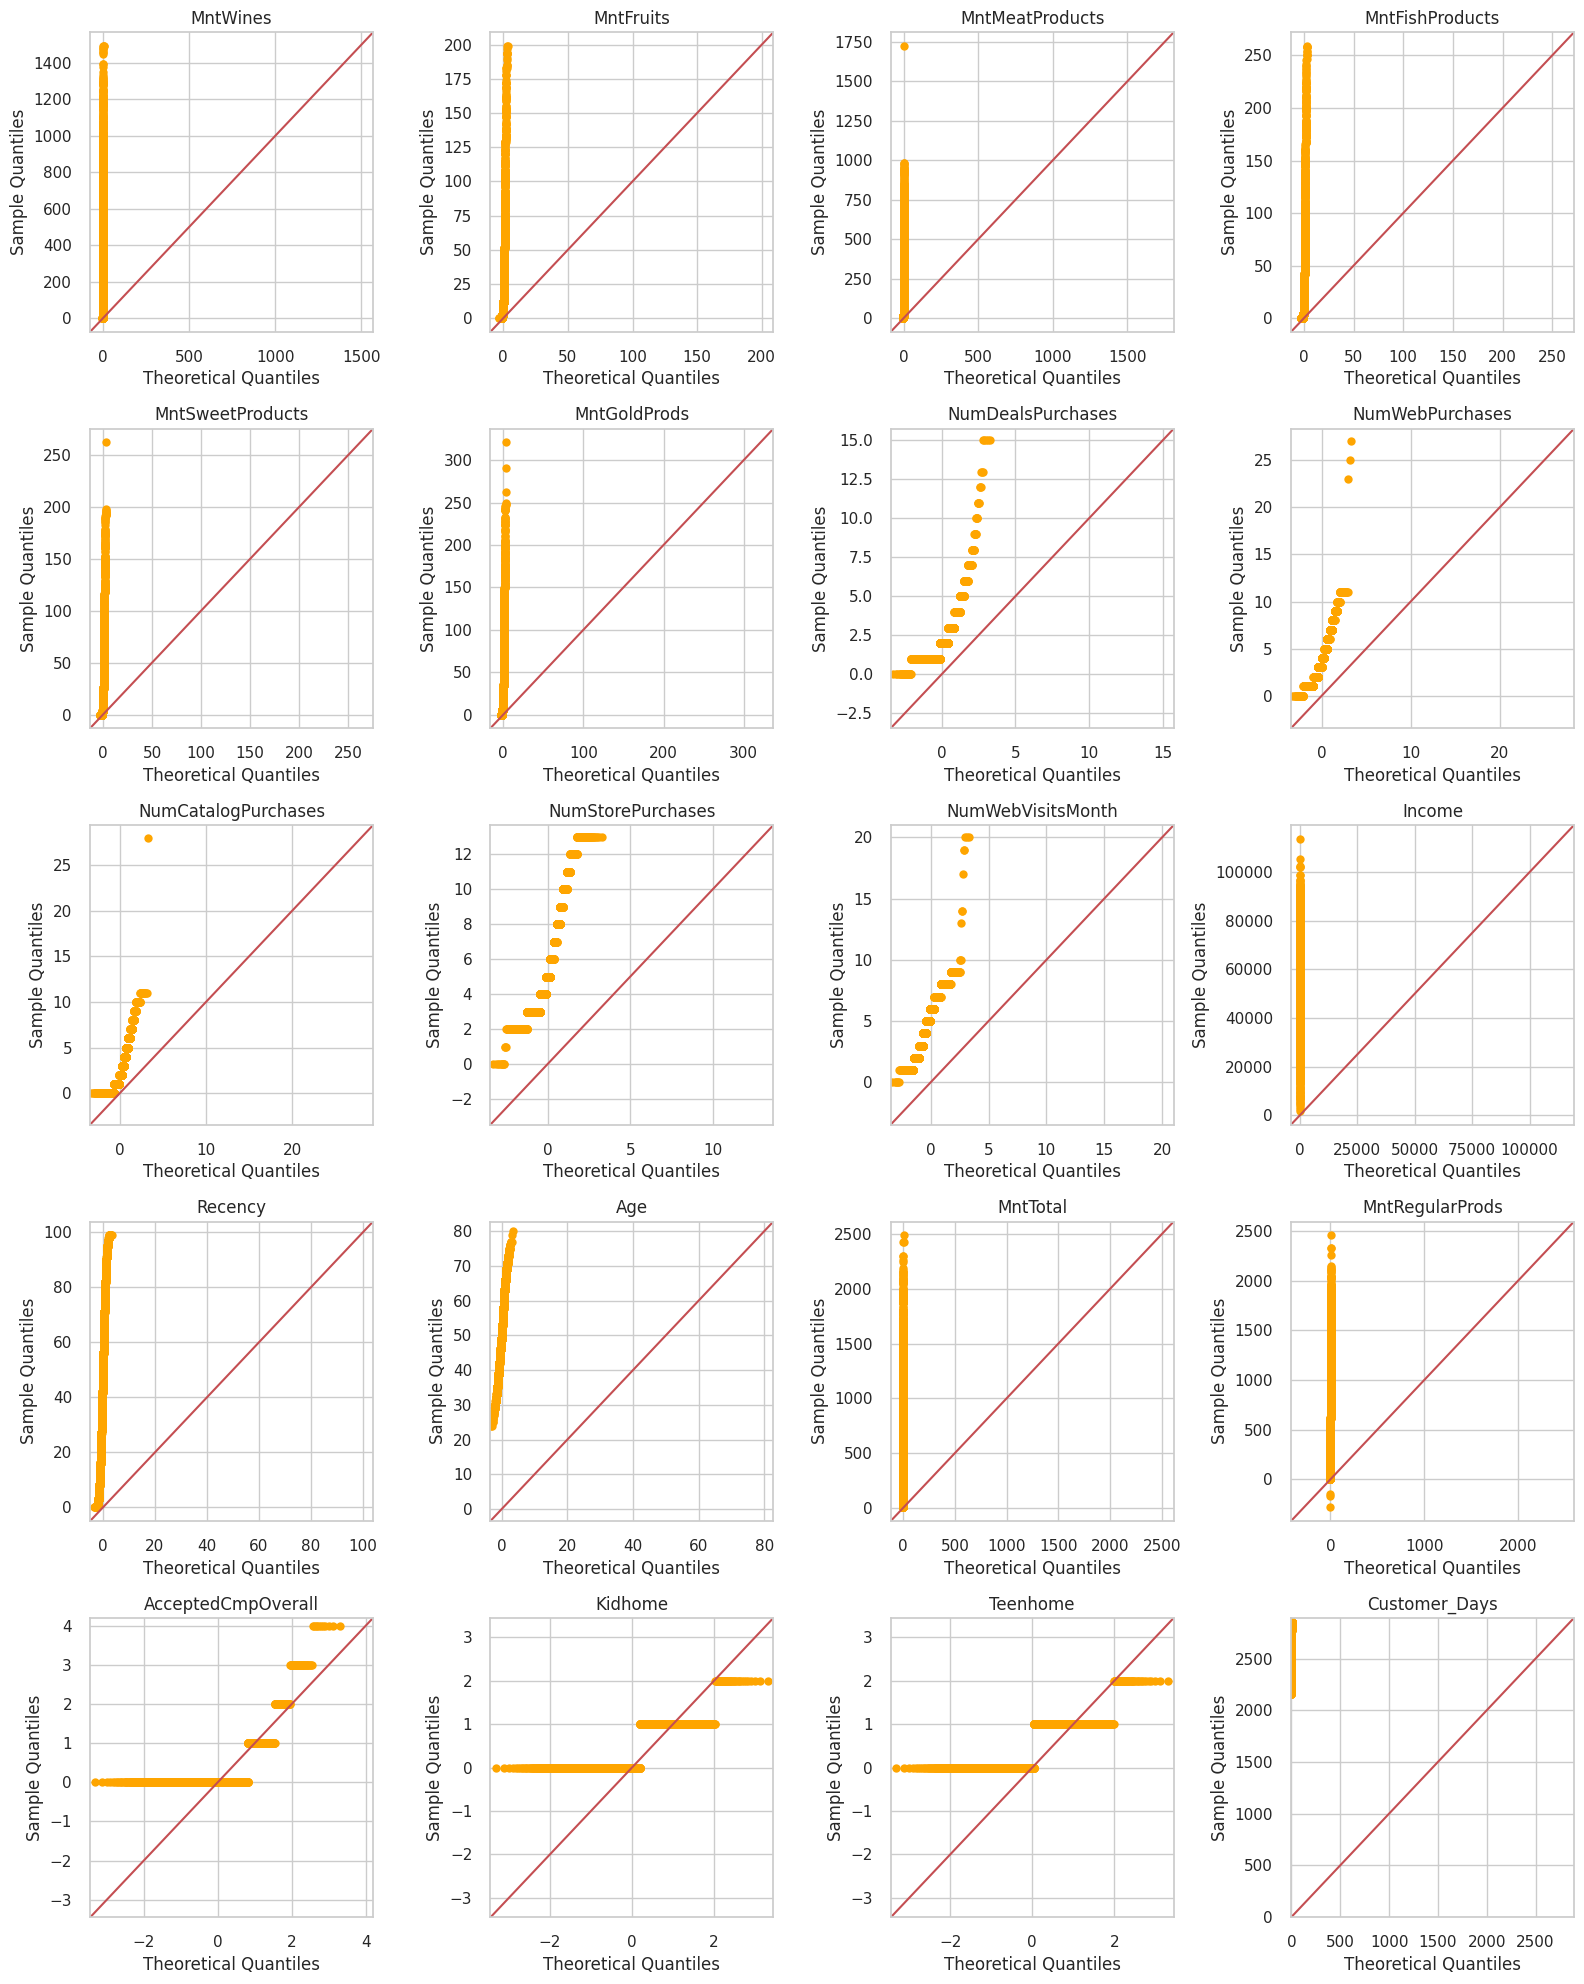

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Calcular o número de subplots necessários
num_cols = len(df_numerical.columns)
num_rows = (num_cols + 3) // 4

# Configurar o layout dos subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

axes = axes.flatten() if num_rows > 1 else [axes]

# Plotar QQ plots para as variáveis
for i, column in enumerate(df_numerical.columns):
    ax = axes[i]

    # Plotar QQ plot
    sm.qqplot(df_numerical[column], line ='45', ax=ax, marker='o', markeredgecolor='#FEA500', markerfacecolor='#FEA500')

    ax.set_title(column)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.grid(True)

# Remover eixos desnecessários
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import shapiro

# Empty list to store the results
results = []

# Perform Shapiro's normality test for each numerical variable
for column in df_numerical.columns:
    stat, p_value = shapiro(df_numerical[column])

    # Determine if the variable is normal or not based on the p-value
    is_normal = 'Normality confirmed' if p_value > 0.05 else 'Normality not confirmed'

    # Add the results to the list
    results.append({
        'Variable': column,
        'P-value': p_value,
        'Normality': is_normal
    })

# Create a DataFrame from the list of results
normality_results = pd.DataFrame(results)

# Print or save the DataFrame with the results
normality_results

Variable       P-value                Normality
0              MntWines  1.537224e-42  Normality not confirmed
1             MntFruits  0.000000e+00  Normality not confirmed
2       MntMeatProducts  0.000000e+00  Normality not confirmed
3       MntFishProducts  0.000000e+00  Normality not confirmed
4      MntSweetProducts  0.000000e+00  Normality not confirmed
5          MntGoldProds  0.000000e+00  Normality not confirmed
6     NumDealsPurchases  0.000000e+00  Normality not confirmed
7       NumWebPurchases  1.306171e-34  Normality not confirmed
8   NumCatalogPurchases  2.631639e-42  Normality not confirmed
9     NumStorePurchases  1.674303e-35  Normality not confirmed
10    NumWebVisitsMonth  3.505789e-31  Normality not confirmed
11               Income  9.199109e-15  Normality not confirmed
12              Recency  1.051384e-25  Normality not confirmed
13                  Age  2.239517e-15  Normality not confirmed
14             MntTotal  8.060129e-41  Normality not confirmed
15      MntRegularProds  1.333616e-41  Normality not confirmed
16   AcceptedCmpOverall  0.000000e+00  Normality not confirmed
17              Kidhome  0.000000e+00  Normality not confirmed
18             Teenhome  0.000000e+00  Normality not confirmed
19        Customer_Days  7.723260e-26  Normality not confirmed

## Categorical Variables ##

### Mode ###

In [20]:
df_categorical = df[[ 'Campaign 1','Campaign 2','Campaign 3', 'Campaign 4',
                     'Campaign 5','Campaign 6','maritalStatus', 'educationLevel','Complain']]
cmp_categorical = df[[ 'Campaign 1','Campaign 2','Campaign 3', 'Campaign 4',
                     'Campaign 5','Campaign 6']]
df_categorical.mode()

Campaign 1 Campaign 2 Campaign 3 Campaign 4 Campaign 5 Campaign 6  \
0   Declined   Declined   Declined   Declined   Declined   Declined   

  maritalStatus educationLevel Complain  
0       Married     Graduation    False

### Stacked Bar Plots ###

 #### Campaign Acceptance ####

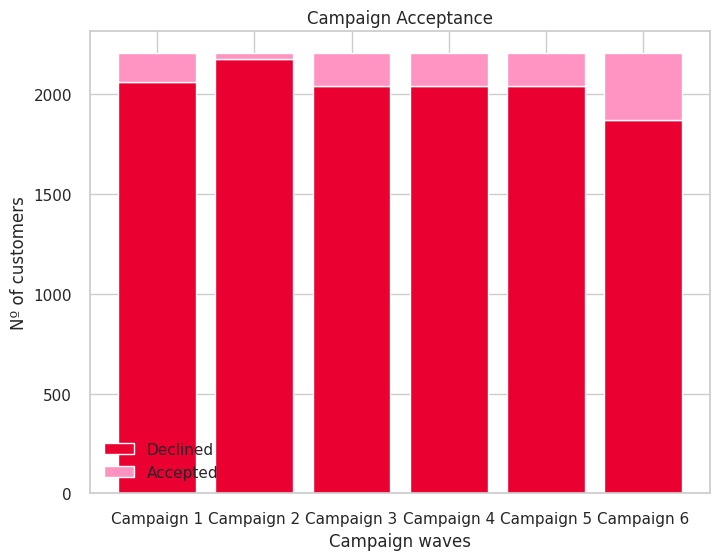

In [21]:
# Calcular a contagem de ocorrências de cada valor em cada coluna categórica
contagem_por_valor_cmp = pd.DataFrame({col: cmp_categorical[col].value_counts() for col in cmp_categorical.columns})

# Transpor o DataFrame para ter as variáveis categóricas como índices
contagem_por_valor = contagem_por_valor_cmp.transpose()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(contagem_por_valor.index, contagem_por_valor['Declined'], label='Declined',color='#EA0031')
plt.bar(contagem_por_valor.index, contagem_por_valor['Accepted'], bottom=contagem_por_valor['Declined'], label='Accepted',color='#FF94C2')

# Adding labels and title
plt.xlabel('Campaign waves')
plt.ylabel('Nº of customers')
plt.title('Campaign Acceptance')
plt.legend()

# Display the plot
plt.show()

In [22]:
count_complain = pd.DataFrame(df_categorical['Complain'].value_counts())

# Transpor o DataFrame para ter as variáveis categóricas como índices
count_complain = count_complain
count_complain

count
Complain       
False      2185
True         20

### Pie Charts ###

#### Customers Complain ####

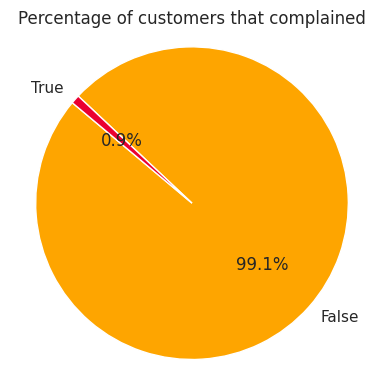

In [23]:
count_complain = pd.DataFrame(df_categorical['Complain'].value_counts())


plt.figure(figsize=(4, 4))  # Ajuste o tamanho conforme necessário
sns.set(style="whitegrid")

# plt.scatter espera coordenadas x, y. Usamos '0' para x porque temos apenas uma categoria.
plt.pie(count_complain['count'], labels=count_complain.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
if i == 1:
  plt.legend(loc="upper left")
plt.title('Percentage of customers that complained')

plt.tight_layout()

#### Campaign Acceptance ####

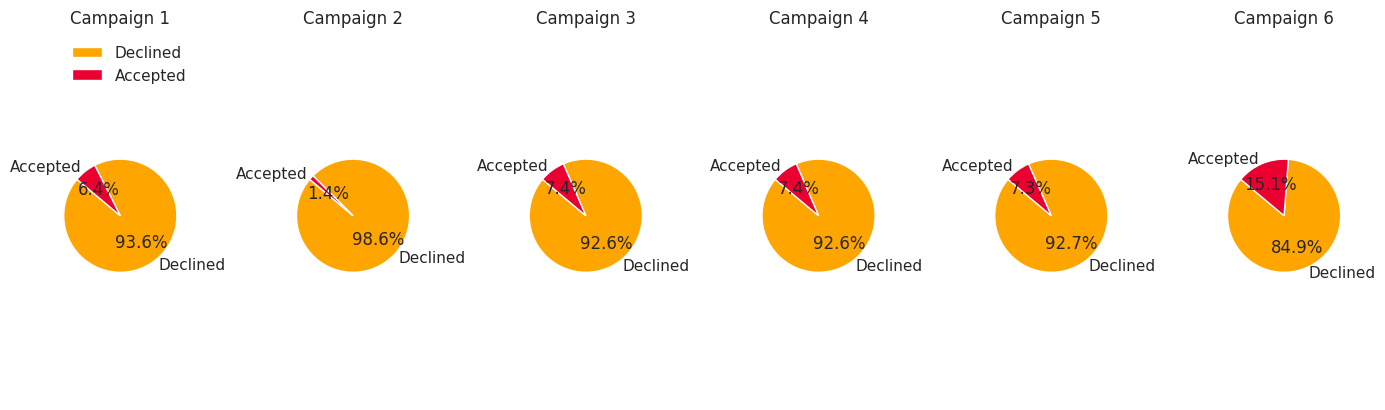

In [24]:
plt.figure(figsize=(16, 12))  # Ajuste o tamanho conforme necessário
sns.set(style="whitegrid")

pie_chart_camp_acctpce = contagem_por_valor.transpose()

for i, coluna in enumerate(pie_chart_camp_acctpce, 1):
    plt.subplot(3, 7, i)  # Ajuste para a quantidade correta de subplots, 3 linhas e até 7 colunas aqui

    # plt.scatter espera coordenadas x, y. Usamos '0' para x porque temos apenas uma categoria.
    plt.pie(pie_chart_camp_acctpce[coluna], labels=pie_chart_camp_acctpce.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    if i == 1:
        plt.legend(loc="upper left")
    plt.title(coluna)

plt.tight_layout()

In [25]:
contagem_por_valor_edu = pd.DataFrame(df_categorical['educationLevel'].value_counts())
contagem_por_valor_edu.transpose()

educationLevel  Graduation  PhD  Master  2n Cycle  Basic
count                 1113  476     364       198     54

### Bar Plots ###

#### Education Level ####

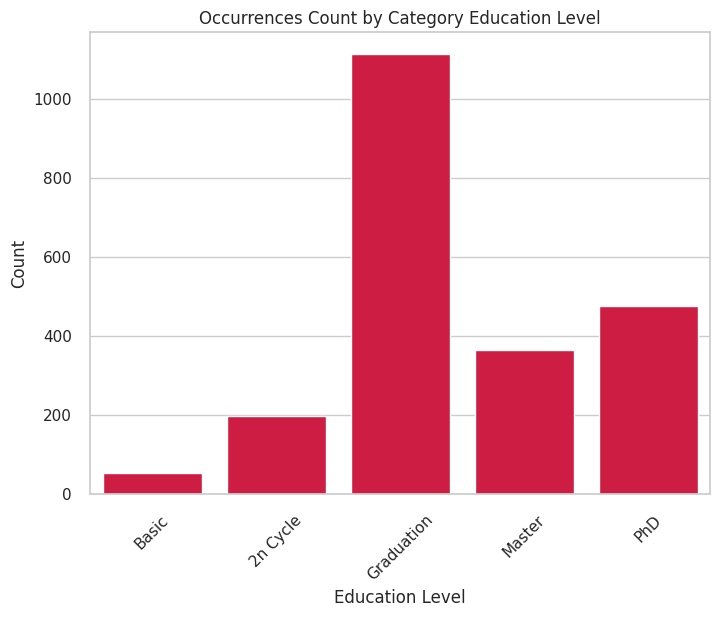

In [26]:
# Calcular a contagem de ocorrências de cada valor em cada coluna categórica
contagem_por_valor_edu = pd.DataFrame(df_categorical['educationLevel'].value_counts())

contagem_por_valor_edu = contagem_por_valor_edu.reindex(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
# Plotar gráficos de barras para cada coluna categórica
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_por_valor_edu.index, y=contagem_por_valor_edu['count'], data=contagem_por_valor_edu, color='#EA0031')
plt.title(f'Occurrences Count by Category Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Marital Status ####

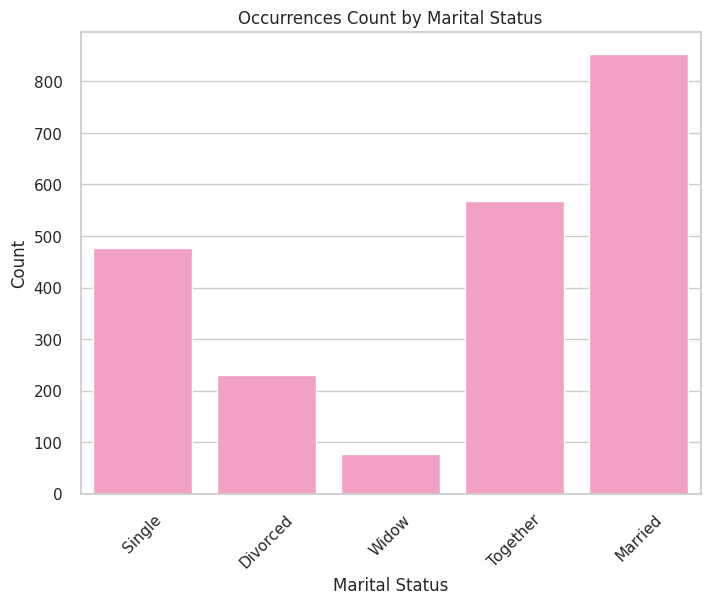

In [27]:
# Calcular a contagem de ocorrências de cada valor em cada coluna categórica
contagem_por_valor_marit = pd.DataFrame(df_categorical['maritalStatus'].value_counts())

contagem_por_valor_marit = contagem_por_valor_marit.reindex(['Single', 'Divorced', 'Widow', 'Together', 'Married'])
# Plotar gráficos de barras para cada coluna categórica
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_por_valor_marit.index, y=contagem_por_valor_marit['count'], data=contagem_por_valor_marit, color='#FF94C2')
plt.title(f'Occurrences Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis #

Possiveis combinações para analisar:
- Cat x Cat;
- Cat x Num;
- Num x Num;

--- Dadas as variáveis do dataset, podemos considerar como importante para o negocio perceber qual o perfil do publico e a eficiencia de campanhas publicitárias.

Cat x Cat:
- AcceptedN + Response x maritalStatus;
- AcceptedN + Response x educationLevel;
- Complain x maritalStatus;
- Complain x educationLevel

Cat x Num:
- 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal' x maritalStatus;
- 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntRegularProds' x educationLevel;
- 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntRegularProds' x Complain;
- 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth', 'MntTotal' x  maritalStatus;
- 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth' x  educationLevel;
- 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth' x  Complain;
- 'Income' x maritalStatus; - makes no sense for business logic
- 'Income' x educationLevel; - makes no sense for business logic
- 'Recency' x maritalStatus;
- 'Recency' x educationLevel;
- 'Recency' x Complain;
- 'Age' x maritalStatus; - makes no sense for business logic
- 'Age' x educationLevel; - makes no sense for business logic
- 'AcceptedCmpOverall' x maritalStatus;
- 'AcceptedCmpOverall' x educationLevel;
- 'AcceptedCmpOverall' x Complain;


Num x Num:
- Numerical variables - Correlation Matrix - Correlation analysis
  - Extract some relevant correlations and make scatter-plots  


## Categorical x Categorical ##


### Campaign x maritalStatus/educationLevel ###


#### Contigency Table | Campaign x MaritalStatus ####

In [28]:
def generate_cont_table_cat1_dfcat2(cat1,df_cat_2):
  list_dfs_cont_tables = []
  for col in df_cat_2.columns:
    col_df_cat1_x_cat2 = pd.crosstab(index=df_categorical[cat1], columns=[cmp_categorical[col]], rownames=[cat1],margins=True, margins_name='Total')
    list_dfs_cont_tables.append(col_df_cat1_x_cat2)
    print(col_df_cat1_x_cat2)

  return list_dfs_cont_tables

In [29]:
list_cmp_x_mart_status = generate_cont_table_cat1_dfcat2('maritalStatus',cmp_categorical)

Campaign 1     Accepted  Declined  Total
maritalStatus                           
Divorced             12       218    230
Married              62       792    854
Single               31       446    477
Together             32       536    568
Widow                 5        71     76
Total               142      2063   2205
Campaign 2     Accepted  Declined  Total
maritalStatus                           
Divorced              5       225    230
Married               7       847    854
Single                5       472    477
Together             12       556    568
Widow                 1        75     76
Total                30      2175   2205
Campaign 3     Accepted  Declined  Total
maritalStatus                           
Divorced             20       210    230
Married              63       791    854
Single               39       438    477
Together             37       531    568
Widow                 4        72     76
Total               163      2042   2205
Campaign 4     A

#### ChiSquare Test | Campaign x MaritalStatus ####

In [30]:
from scipy.stats import chi2_contingency

In [31]:
campaign_names = ["Campaign 1", "Campaign 2", "Campaign 3", "Campaign 4", "Campaign 5", "Campaign 6"]
results_marital = pd.DataFrame(columns=campaign_names, index=["Chi2 Statistic", "P-value"])

# Calcular o qui-quadrado e o p-valor para cada tabela de contingência
for campaign, table in zip(campaign_names, list_cmp_x_mart_status):
    chi2, p, dof, expected = chi2_contingency(table.iloc[:-1, :-1])  # Exclui a linha e coluna 'Total'
    results_marital[campaign] = [chi2, p]

# Mostra os resultados
print("Chi-Squared Test of Independence: Marital Status vs. Marketing Campaigns\n")
results_marital

Chi-Squared Test of Independence: Marital Status vs. Marketing Campaigns



Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5  \
Chi2 Statistic    2.141445    5.737514    2.142255    4.071607    1.871900   
P-value           0.709762    0.219627    0.709614    0.396402    0.759305   

                  Campaign 6  
Chi2 Statistic  5.055983e+01  
P-value         2.758648e-10

#### Stacked Bar Plot | Campaign x MaritalStatus ####

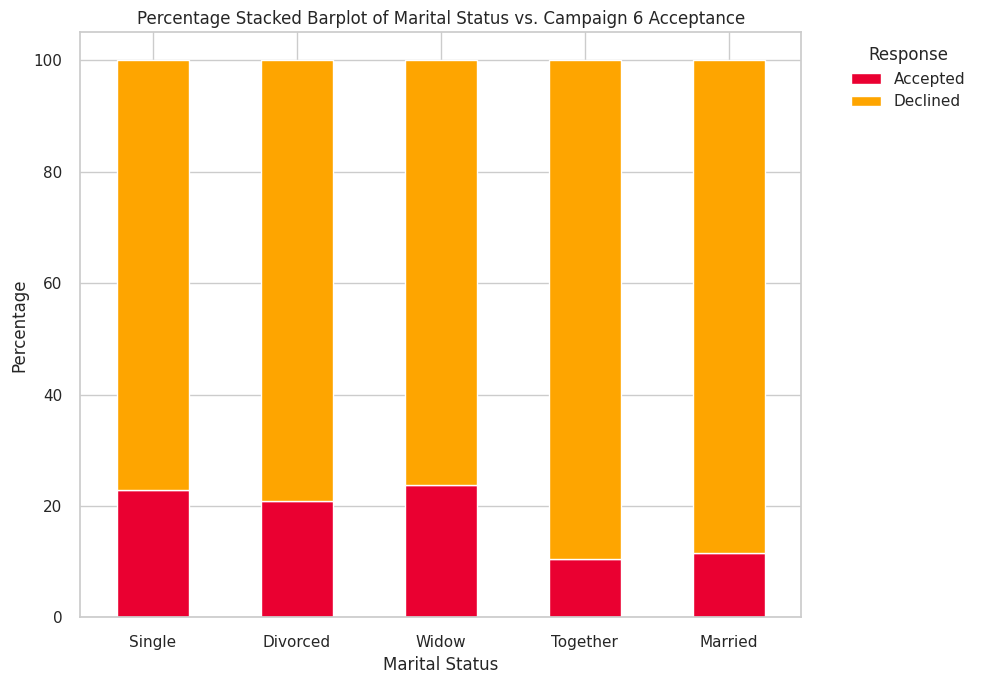

In [32]:
# Agrupar os dados por "maritalStatus" e calcular as contagens para cada resposta da ultima campanha
df_grouped = df.groupby('maritalStatus')['Campaign 6'].value_counts().unstack().fillna(0)
df_grouped = df_grouped.reindex(['Single', 'Divorced', 'Widow', 'Together', 'Married'])
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Criar um plot empilhado
ax = df_percent.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#EA0031', '#FEA500'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Marital Status')
ax.set_title('Percentage Stacked Barplot of Marital Status vs. Campaign 6 Acceptance')
plt.xticks(rotation=0)  # Mantém os rótulos na horizontal
plt.legend(title='Response', labels=['Accepted', 'Declined'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Contigency Table | Campaign x EducationLevel ####

In [33]:
list_cmp_x_edu_level = generate_cont_table_cat1_dfcat2('educationLevel', cmp_categorical)

Campaign 1      Accepted  Declined  Total
educationLevel                           
2n Cycle              14       184    198
Basic                  0        54     54
Graduation            80      1033   1113
Master                18       346    364
PhD                   30       446    476
Total                142      2063   2205
Campaign 2      Accepted  Declined  Total
educationLevel                           
2n Cycle               2       196    198
Basic                  0        54     54
Graduation            16      1097   1113
Master                 2       362    364
PhD                   10       466    476
Total                 30      2175   2205
Campaign 3      Accepted  Declined  Total
educationLevel                           
2n Cycle              15       183    198
Basic                  6        48     54
Graduation            78      1035   1113
Master                24       340    364
PhD                   40       436    476
Total                163      2042

#### ChiSquare Test | Campaign X EducationLevel ####

In [34]:
results_educacional = pd.DataFrame(columns=campaign_names, index=["Chi2 Statistic", "P-value"])

# Calcular o qui-quadrado e o p-valor para cada tabela de contingência
for campaign, table in zip(campaign_names, list_cmp_x_edu_level):
    chi2, p, dof, expected = chi2_contingency(table.iloc[:-1, :-1])  # Exclui a linha e coluna 'Total'
    results_educacional[campaign] = [chi2, p]

# Mostra os resultados
print("Relationship between Education Level and Marketing Campaign Effectiveness:Chi-Squared Statistics and P-values.\n")
results_educacional

Relationship between Education Level and Marketing Campaign Effectiveness:Chi-Squared Statistics and P-values.



Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5  \
Chi2 Statistic    6.245760    4.703369    2.390748   10.357209    6.367169   
P-value           0.181531    0.319109    0.664300    0.034822    0.173355   

                Campaign 6  
Chi2 Statistic   23.656607  
P-value           0.000094

#### Stacked Bar Plot | Campaign x EducationLevel ####

In [35]:
# Agrupar os dados por "educationLevel" e calcular as contagens para cada resposta da "Proposta 4"
df_grouped_proposal = df.groupby('educationLevel')['Campaign 4'].value_counts().unstack().fillna(0)
df_grouped_proposal = df_grouped_proposal.reindex(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

# Calcular porcentagens
df_percent_proposal = df_grouped_proposal.div(df_grouped_proposal.sum(axis=1), axis=0) * 100

# Agrupar os dados por "educationLevel" e calcular as contagens para cada resposta da "Response"
df_grouped_response = df.groupby('educationLevel')['Campaign 6'].value_counts().unstack().fillna(0)
df_grouped_response = df_grouped_response.reindex(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

# Calcular porcentagens
df_percent_response = df_grouped_response.div(df_grouped_response.sum(axis=1), axis=0) * 100

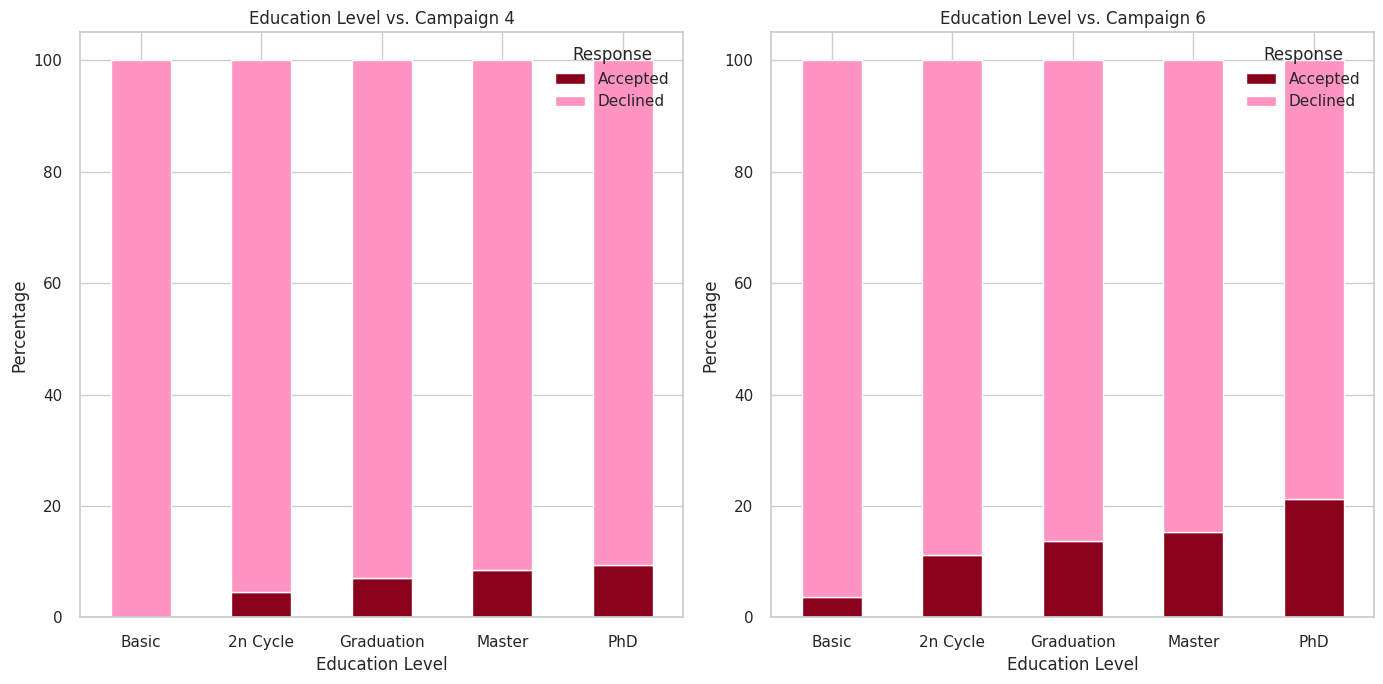

In [36]:
# Criar figura e eixos para os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Gráfico "educationLevel" vs. "Proposal 4"
ax_proposal = df_percent_proposal.plot(kind='bar', stacked=True, ax=axes[0], color=['#8A011B', '#FF94C2'])
ax_proposal.set_ylabel('Percentage')
ax_proposal.set_xlabel('Education Level')
ax_proposal.set_title('Education Level vs. Campaign 4')
ax_proposal.legend(title='Response', labels=['Accepted', 'Declined'])
ax_proposal.set_xticklabels(ax_proposal.get_xticklabels(), rotation=0)

# Gráfico "educationLevel" vs. "Response"
ax_response = df_percent_response.plot(kind='bar', stacked=True, ax=axes[1], color=['#8A011B', '#FF94C2'])
ax_response.set_ylabel('Percentage')
ax_response.set_xlabel('Education Level')
ax_response.set_title('Education Level vs. Campaign 6')
ax_response.legend(title='Response', labels=['Accepted', 'Declined'])
ax_response.set_xticklabels(ax_response.get_xticklabels(), rotation=0)

# Ajustar o layout
plt.tight_layout()
plt.show()

In [37]:
marit_status_x_edu_level = pd.crosstab(index=df_categorical['educationLevel'], columns=[df_categorical['maritalStatus']], rownames=['educationLevel'],margins=True, margins_name='Total')
marit_status_x_edu_level

maritalStatus   Divorced  Married  Single  Together  Widow  Total
educationLevel                                                   
2n Cycle              22       80      35        56      5    198
Basic                  1       20      18        14      1     54
Graduation           118      429     248       283     35   1113
Master                37      138      77       101     11    364
PhD                   52      187      99       114     24    476
Total                230      854     477       568     76   2205

In [38]:
res = chi2_contingency(marit_status_x_edu_level)
print("Qui-Quadrado:", res.statistic)
print("p-value:", res.pvalue)

Qui-Quadrado: 16.205244635440557
p-value: 0.9085792991588382


Complain x maritStatus/educationLevel

In [39]:
count_complain_x_marital_status = pd.crosstab(index=df_categorical['Complain'], columns=[df_categorical['maritalStatus']], rownames=['Complain'],margins=True, margins_name='Total')
count_complain_x_marital_status

maritalStatus  Divorced  Married  Single  Together  Widow  Total
Complain                                                        
False               229      846     471       563     76   2185
True                  1        8       6         5      0     20
Total               230      854     477       568     76   2205

In [40]:
res = chi2_contingency(count_complain_x_marital_status)
print("Qui-Quadrado:", res.statistic)
print("p-value:", res.pvalue)

Qui-Quadrado: 1.9324785924349863
p-value: 0.9968319335103694


In [41]:
count_complain_x_edu_lvl = pd.crosstab(index=df_categorical['Complain'], columns=[df_categorical['educationLevel']], rownames=['Complain'],margins=True, margins_name='Total')
count_complain_x_edu_lvl

educationLevel  2n Cycle  Basic  Graduation  Master  PhD  Total
Complain                                                       
False                195     54        1099     362  475   2185
True                   3      0          14       2    1     20
Total                198     54        1113     364  476   2205

In [42]:
res = chi2_contingency(count_complain_x_edu_lvl)
print("Qui-Quadrado:", res.statistic)
print("p-value:", res.pvalue)

Qui-Quadrado: 5.923340529293711
p-value: 0.8216621735632803


Auto combinações Campaign x Campaign

In [43]:
from itertools import combinations
list_contingency_tables = []

column_combinations = list(combinations(cmp_categorical.columns, 2))

# Calcular tabelas de contingência para cada combinação de colunas
for col1, col2 in column_combinations:
    contingency_table = pd.crosstab(index=cmp_categorical[col1], columns=cmp_categorical[col2], margins=True, margins_name='Total')
    list_contingency_tables.append(contingency_table)

list_contingency_tables

[Campaign 2  Accepted  Declined  Total
 Campaign 1                           
 Accepted          13       129    142
 Declined          17      2046   2063
 Total             30      2175   2205,
 Campaign 3  Accepted  Declined  Total
 Campaign 1                           
 Accepted          24       118    142
 Declined         139      1924   2063
 Total            163      2042   2205,
 Campaign 4  Accepted  Declined  Total
 Campaign 1                           
 Accepted          45        97    142
 Declined         119      1944   2063
 Total            164      2041   2205,
 Campaign 5  Accepted  Declined  Total
 Campaign 1                           
 Accepted          68        74    142
 Declined          93      1970   2063
 Total            161      2044   2205,
 Campaign 6  Accepted  Declined  Total
 Campaign 1                           
 Accepted          79        63    142
 Declined         254      1809   2063
 Total            333      1872   2205,
 Campaign 3  Accepte

In [44]:
# Sua lista de tabelas de contingência
contingency_tables = [
    {'Campaigns': '1_vs_2', 'Table': [[13, 129], [17, 2046]]},
    {'Campaigns': '1_vs_3', 'Table': [[24, 118], [139, 1924]]},
    {'Campaigns': '1_vs_4', 'Table': [[45, 97], [119, 1944]]},
    {'Campaigns': '1_vs_5', 'Table': [[68, 74], [93, 1970]]},
    {'Campaigns': '1_vs_6', 'Table': [[79, 63], [254, 1809]]},
    {'Campaigns': '2_vs_3', 'Table': [[7, 23], [156, 2019]]},
    {'Campaigns': '2_vs_4', 'Table': [[22, 8], [142, 2033]]},
    {'Campaigns': '2_vs_5', 'Table': [[17, 13], [144, 2031]]},
    {'Campaigns': '2_vs_6', 'Table': [[20, 10], [313, 1862]]},
    {'Campaigns': '3_vs_4', 'Table': [[0, 163], [164, 1878]]},
    {'Campaigns': '3_vs_5', 'Table': [[24, 139], [137, 1905]]},
    {'Campaigns': '3_vs_6', 'Table': [[77, 86], [256, 1786]]},
    {'Campaigns': '4_vs_5', 'Table': [[59, 105], [102, 1939]]},
    {'Campaigns': '4_vs_6', 'Table': [[62, 102], [271, 1770]]},
    {'Campaigns': '5_vs_6', 'Table': [[91, 70], [242, 1802]]}
]

results = []

for entry in contingency_tables:
    # Convertendo a lista para uma matriz numpy
    table_np = np.array(entry['Table'])
    # Calculando o teste qui-quadrado e o valor p
    chi2, p_value, _, _ = chi2_contingency(table_np)
    # Adicionando a coluna 'Correlation'
    correlation = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    results.append({'Campaigns': entry['Campaigns'], 'Chi-Square': chi2, 'P-value': p_value, 'Correlation': correlation})

results_df = pd.DataFrame(results)

results_df

Campaigns  Chi-Square       P-value Correlation
0     1_vs_2   62.639104  2.482747e-15  Correlated
1     1_vs_3   18.589962  1.620717e-05  Correlated
2     1_vs_4  125.932519  3.181188e-29  Correlated
3     1_vs_5  362.983125  6.309928e-81  Correlated
4     1_vs_6  191.107224  1.822433e-43  Correlated
5     2_vs_3    9.052296  2.623652e-03  Correlated
6     2_vs_4  182.248340  1.565067e-41  Correlated
7     2_vs_5  102.232472  4.937391e-24  Correlated
8     2_vs_6   59.061336  1.528330e-14  Correlated
9     3_vs_4   13.000458  3.114147e-04  Correlated
10    3_vs_5   13.166574  2.849873e-04  Correlated
11    3_vs_6  139.089324  4.210775e-32  Correlated
12    4_vs_5  210.674675  9.787502e-48  Correlated
13    4_vs_6   69.325569  8.348030e-17  Correlated
14    5_vs_6  228.927232  1.021640e-51  Correlated

## Categorical x Numerical ##

Analizing the amount spent in products in the last 2 years and its distribution across the categorical variables maritalStatus / educationLevel / Complain:


### Categorical K>2 : maritalStatus, educationLevel ###

#### Kruskal-Wallis test (K>2) | MaritalStatus and Education Level x Numerical Variables ####

In [45]:
mnt_spnt_prds = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']]

In [46]:
import pandas as pd
import scipy
from itertools import product
from scipy.stats import kruskal

def kruskal_wallis_test(df, categorical_vars, numerical_vars):
    results = []

    for cat_var, num_var in product(categorical_vars, numerical_vars):
        groups = []
        for group, data in df.groupby(cat_var):
            groups.append(data[num_var])

        # Perform Kruskal-Wallis test
        stat, p_value = scipy.stats.kruskal(*groups)
        # Add a column indicating association based on p-value
        association = 'Associated' if p_value < 0.05 else 'Not associated'
        results.append({'Categorical Variable': cat_var, 'Numerical Variable': num_var, 'Statistic': stat, 'P-value': p_value, 'Is Group Associated?': association})

    test_results = pd.DataFrame(results)
    test_results = test_results.sort_values(by='P-value')

    return test_results

kover2_cat = df_categorical[['maritalStatus','educationLevel']]

krusk_df = kruskal_wallis_test(df, kover2_cat, df_numerical)
krusk_df

Categorical Variable   Numerical Variable   Statistic       P-value  \
20       educationLevel             MntWines  205.144383  2.942432e-43   
31       educationLevel               Income  140.002639  2.818900e-29   
35       educationLevel      MntRegularProds  119.664537  6.299556e-25   
13        maritalStatus                  Age   99.025820  1.585692e-20   
22       educationLevel      MntMeatProducts   97.498064  3.352347e-20   
33       educationLevel                  Age   89.548469  1.642170e-18   
34       educationLevel             MntTotal   87.181501  5.224231e-18   
24       educationLevel     MntSweetProducts   74.762165  2.237275e-15   
23       educationLevel      MntFishProducts   73.648564  3.847585e-15   
29       educationLevel    NumStorePurchases   71.777040  9.565442e-15   
21       educationLevel            MntFruits   69.398399  3.040798e-14   
25       educationLevel         MntGoldProds   65.532434  1.987445e-13   
27       educationLevel      NumWebPurchases   60.513955  2.262084e-12   
28       educationLevel  NumCatalogPurchases   55.231919  2.905023e-11   
38       educationLevel             Teenhome   53.907004  5.504007e-11   
18        maritalStatus             Teenhome   32.373905  1.604334e-06   
30       educationLevel    NumWebVisitsMonth   28.410744  1.029633e-05   
37       educationLevel              Kidhome   13.112661  1.073823e-02   
39       educationLevel        Customer_Days   12.947385  1.153576e-02   
17        maritalStatus              Kidhome   12.643445  1.315601e-02   
5         maritalStatus         MntGoldProds    9.035275  6.022381e-02   
6         maritalStatus    NumDealsPurchases    7.620047  1.065308e-01   
7         maritalStatus      NumWebPurchases    7.615049  1.067418e-01   
8         maritalStatus  NumCatalogPurchases    7.456202  1.136562e-01   
0         maritalStatus             MntWines    7.145067  1.284178e-01   
36       educationLevel   AcceptedCmpOverall    6.852647  1.438831e-01   
11        maritalStatus               Income    5.983661  2.003718e-01   
15        maritalStatus      MntRegularProds    5.581177  2.326856e-01   
14        maritalStatus             MntTotal    5.220184  2.654420e-01   
9         maritalStatus    NumStorePurchases    4.260477  3.719004e-01   
3         maritalStatus      MntFishProducts    4.254075  3.727112e-01   
26       educationLevel    NumDealsPurchases    4.085517  3.945560e-01   
10        maritalStatus    NumWebVisitsMonth    3.784389  4.359712e-01   
1         maritalStatus            MntFruits    3.223624  5.211238e-01   
2         maritalStatus      MntMeatProducts    3.154049  5.323846e-01   
32       educationLevel              Recency    2.553368  6.351056e-01   
12        maritalStatus              Recency    1.556823  8.165305e-01   
19        maritalStatus        Customer_Days    0.896018  9.251314e-01   
16        maritalStatus   AcceptedCmpOverall    0.839064  9.331356e-01   
4         maritalStatus     MntSweetProducts    0.734835  9.469646e-01   

   Is Group Associated?  
20           Associated  
31           Associated  
35           Associated  
13           Associated  
22           Associated  
33           Associated  
34           Associated  
24           Associated  
23           Associated  
29           Associated  
21           Associated  
25           Associated  
27           Associated  
28           Associated  
38           Associated  
18           Associated  
30           Associated  
37           Associated  
39           Associated  
17           Associated  
5        Not associated  
6        Not associated  
7        Not associated  
8        Not associated  
0        Not associated  
36       Not associated  
11       Not associated  
15       Not associated  
14       Not associated  
9        Not associated  
3        Not associated  
26       Not associated  
10       Not associated  
1        Not associated  
2        Not associated  
32       Not associated  
12    

Numerical variables that has association with educationLevel

In [47]:
list_num_edu_lvl_associated = krusk_df[(krusk_df['Categorical Variable'] == 'educationLevel') & (krusk_df['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_edu_lvl_associated

['MntWines',
 'Income',
 'MntRegularProds',
 'MntMeatProducts',
 'Age',
 'MntTotal',
 'MntSweetProducts',
 'MntFishProducts',
 'NumStorePurchases',
 'MntFruits',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'Teenhome',
 'NumWebVisitsMonth',
 'Kidhome',
 'Customer_Days']

Numerical variables that has association with maritalStatus

In [48]:
list_num_marit_status_associated = krusk_df[(krusk_df['Categorical Variable'] == 'maritalStatus') & (krusk_df['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_marit_status_associated

['Age', 'Teenhome', 'Kidhome']

In [49]:
def box_plot_list_num_x_categorical(cat_var, list_of_numerical):
  plt.figure(figsize=(16, 16))  # Ajuste o tamanho conforme necessário
  sns.set(style="whitegrid")

  num_values = df[list_of_numerical]
  cat_values = df[cat_var]


  for i, product in enumerate(num_values, 1):
      plt.subplot(5, 4, i)  # Ajuste para a quantidade correta de subplots, 3 linhas e até 7 colunas aqui
      sns.boxplot(x=cat_values,y=num_values[product], color='#EA0031')

      # Calculate mean for each category
      means = num_values.groupby(cat_values)[product].mean()

      # Plot mean for each category
      x_values = range(len(means))
      plt.scatter(x_values, means, color='#FEA500', label='Média', zorder=5)


      if i == 1:
          plt.legend(loc="upper left")
      plt.title(product)

  plt.tight_layout()
  plt.show()

#### Box-Plot K>2 and Associated | Education Level x Num ####

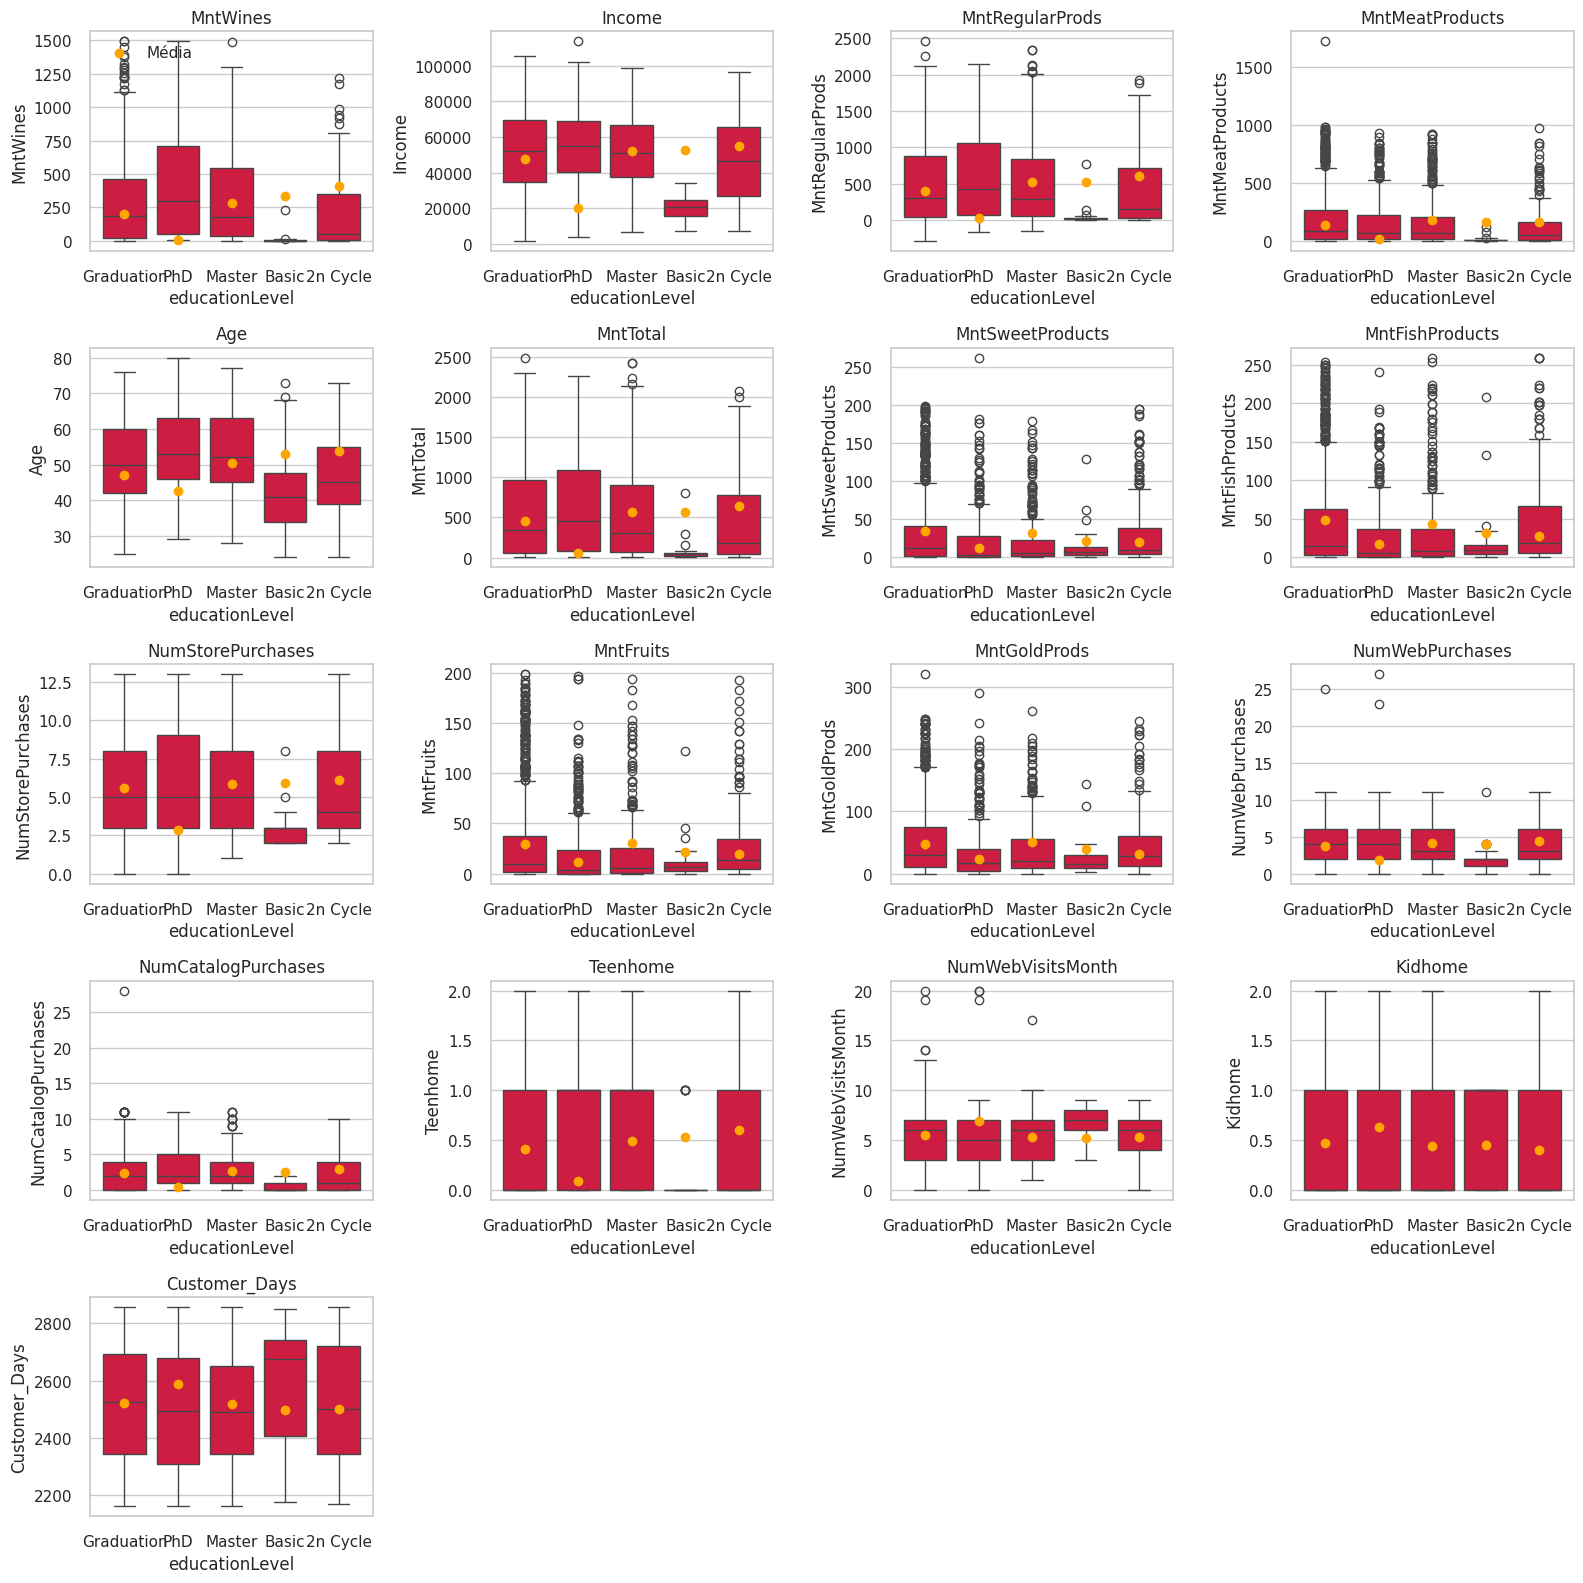

In [50]:
box_plot_list_num_x_categorical('educationLevel',list_num_edu_lvl_associated)

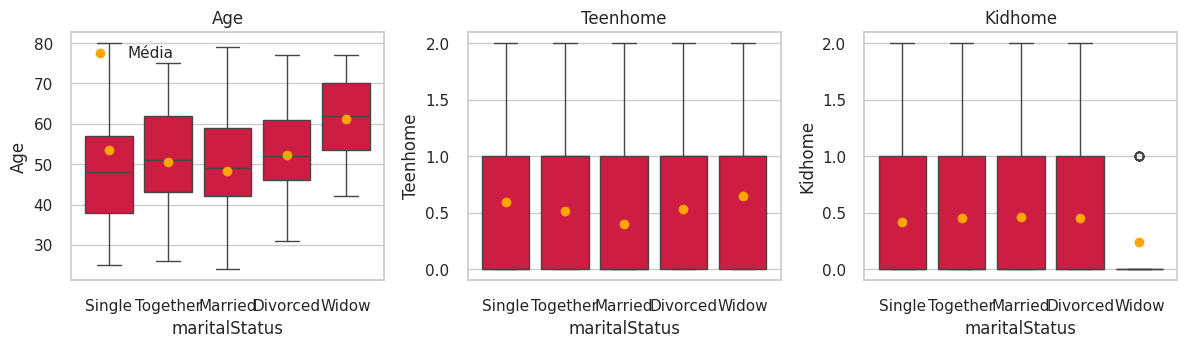

In [51]:
box_plot_list_num_x_categorical('maritalStatus',list_num_marit_status_associated)

### Categorical K=2 : Campaign N, Complain  ###

#### Mann-Whitney U test (K=2)  | Campaign N, Complain x Numerical Variables ####

In [52]:
import pandas as pd
import scipy.stats as stats
from itertools import product

def mann_whitney_u_test(df, categorical_vars, numerical_vars):
    results = []

    for cat_var, num_var in product(categorical_vars, numerical_vars):
        groups = []
        for group, data in df.groupby(cat_var):
            groups.append(data[num_var])

        # Perform Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(*groups)

        # Add a column indicating association based on p-value
        association = 'Associated' if p_value < 0.05 else 'Not associated'

        results.append({'Categorical Variable': cat_var, 'Numerical Variable': num_var, 'Statistic': stat, 'P-value': p_value, 'Is Group Associated?': association})

    test_results = pd.DataFrame(results)
    test_results = test_results.sort_values(by='P-value')

    return test_results

categorical_vars = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6', 'Complain']  # List of categorical variables
num_without_cmp_accpt = df_numerical.drop('AcceptedCmpOverall', axis=1,)
numerical_vars = num_without_cmp_accpt.columns.tolist()  # List of numerical variables from df_numerical


mannwhitneyu_results = mann_whitney_u_test(df, categorical_vars, numerical_vars)
mannwhitneyu_results

Categorical Variable Numerical Variable  Statistic       P-value  \
87            Campaign 5             Income   310193.5  3.031723e-78   
90            Campaign 5           MntTotal   304735.0  1.251735e-72   
91            Campaign 5    MntRegularProds   304146.5  4.902812e-72   
76            Campaign 5           MntWines   298173.0  3.682504e-66   
11            Campaign 1             Income   261680.5  1.535550e-55   
..                   ...                ...        ...           ...   
31            Campaign 2            Recency    32377.5  9.431420e-01   
23            Campaign 2   MntSweetProducts    32412.5  9.510126e-01   
127             Complain                Age    21730.0  9.663588e-01   
88            Campaign 5            Recency   164856.5  9.677959e-01   
22            Campaign 2    MntFishProducts    32509.0  9.733182e-01   

    Is Group Associated?  
87            Associated  
90            Associated  
91            Associated  
76            Associated  
11            Associated  
..                   ...  
31        Not associated  
23        Not associated  
127       Not associated  
88        Not associated  
22        Not associated  

[133 rows x 5 columns]

In [53]:
highest_p_value_rows = mannwhitneyu_results.loc[mannwhitneyu_results.groupby('Categorical Variable')['P-value'].idxmin()]
highest_p_value_rows_associated = highest_p_value_rows[highest_p_value_rows['Is Group Associated?'] == 'Associated']
highest_p_value_rows_associated

Categorical Variable   Numerical Variable  Statistic       P-value  \
11            Campaign 1               Income   261680.5  1.535550e-55   
19            Campaign 2             MntWines    55205.0  7.049267e-11   
43            Campaign 3         MntGoldProds   217426.5  6.975071e-11   
57            Campaign 4             MntWines   281912.0  2.681020e-48   
87            Campaign 5               Income   310193.5  3.031723e-78   
103           Campaign 6  NumCatalogPurchases   426970.0  7.035959e-28   

    Is Group Associated?  
11            Associated  
19            Associated  
43            Associated  
57            Associated  
87            Associated  
103           Associated

#### Box-Plot K=2 and Associated | Campaing N x Most associated numerica varaibles ####

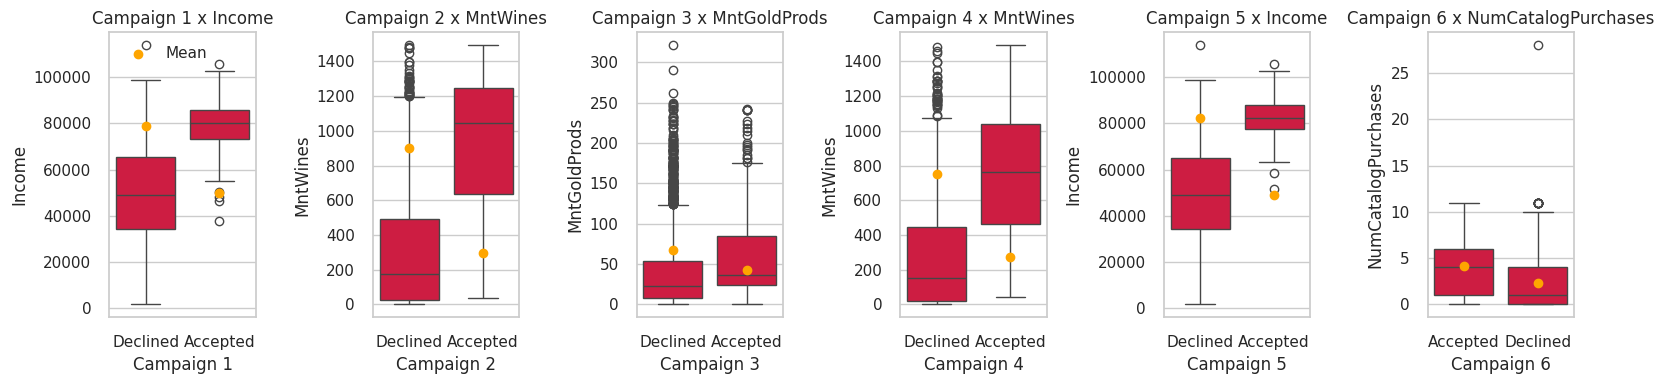

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4))  # Adjust the size as needed
sns.set(style="whitegrid")

# Define the number of rows and columns for subplots
num_plots = len(highest_p_value_rows_associated)
num_cols = 6  # Assuming you want 6 columns
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

for i, (_, row) in enumerate(highest_p_value_rows_associated.iterrows(), 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust for the correct number of subplots
    num_value = df[row['Numerical Variable']]
    cat_value = df[row['Categorical Variable']]

    # Plot box plot
    sns.boxplot(x=cat_value, y=num_value, color='#EA0031')

    # Calculate mean for each category
    means = num_value.groupby(cat_value).mean()

    # Plot mean for each category
    x_values = range(len(means))
    plt.scatter(x_values, means, color='#FEA500', label='Mean', zorder=5)

    plt.title(row['Categorical Variable'] + " x " + row['Numerical Variable'])
    if i == 1:
        plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


In [55]:
list_num_cmp1_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 1') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp1_associated

['Income',
 'MntTotal',
 'MntRegularProds',
 'MntWines',
 'NumCatalogPurchases',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntFishProducts',
 'NumWebVisitsMonth',
 'NumStorePurchases',
 'NumWebPurchases',
 'Kidhome',
 'NumDealsPurchases',
 'MntGoldProds',
 'MntFruits',
 'Teenhome']

In [56]:
list_num_cmp2_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 2') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp2_associated

['MntWines',
 'MntTotal',
 'MntRegularProds',
 'Income',
 'NumCatalogPurchases',
 'Kidhome',
 'NumStorePurchases',
 'MntGoldProds',
 'MntMeatProducts',
 'NumDealsPurchases']

In [57]:
list_num_cmp3_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 3') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp3_associated

['MntGoldProds',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'Teenhome']

In [58]:
list_num_cmp4_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 4') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp4_associated

['MntWines',
 'MntRegularProds',
 'MntTotal',
 'Income',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'NumWebPurchases',
 'Kidhome',
 'MntMeatProducts',
 'Age',
 'MntGoldProds']

In [59]:
list_num_cmp5_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 5') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp5_associated

['Income',
 'MntTotal',
 'MntRegularProds',
 'MntWines',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'NumDealsPurchases',
 'MntSweetProducts',
 'MntFruits',
 'NumStorePurchases',
 'MntFishProducts',
 'Kidhome',
 'Teenhome',
 'MntGoldProds',
 'NumWebPurchases']

In [60]:
list_num_cmp6_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Campaign 6') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_cmp6_associated

['NumCatalogPurchases',
 'MntTotal',
 'MntMeatProducts',
 'MntRegularProds',
 'Recency',
 'MntWines',
 'Customer_Days',
 'MntGoldProds',
 'NumWebPurchases',
 'Income',
 'Teenhome',
 'MntFruits',
 'MntSweetProducts',
 'MntFishProducts',
 'Kidhome',
 'NumStorePurchases']

In [61]:
list_num_complain_associated = mannwhitneyu_results[(mannwhitneyu_results['Categorical Variable'] == 'Complain') & (mannwhitneyu_results['Is Group Associated?'] == 'Associated')]['Numerical Variable'].tolist()
list_num_complain_associated

[]

Analizing the purchases in the last 2 years and its distribution across the categorical variables maritalStatus / educationLevel:

## Numerical x Numerical ##


### Correlation Matrix ###

Defining key correlations in business perspectives:


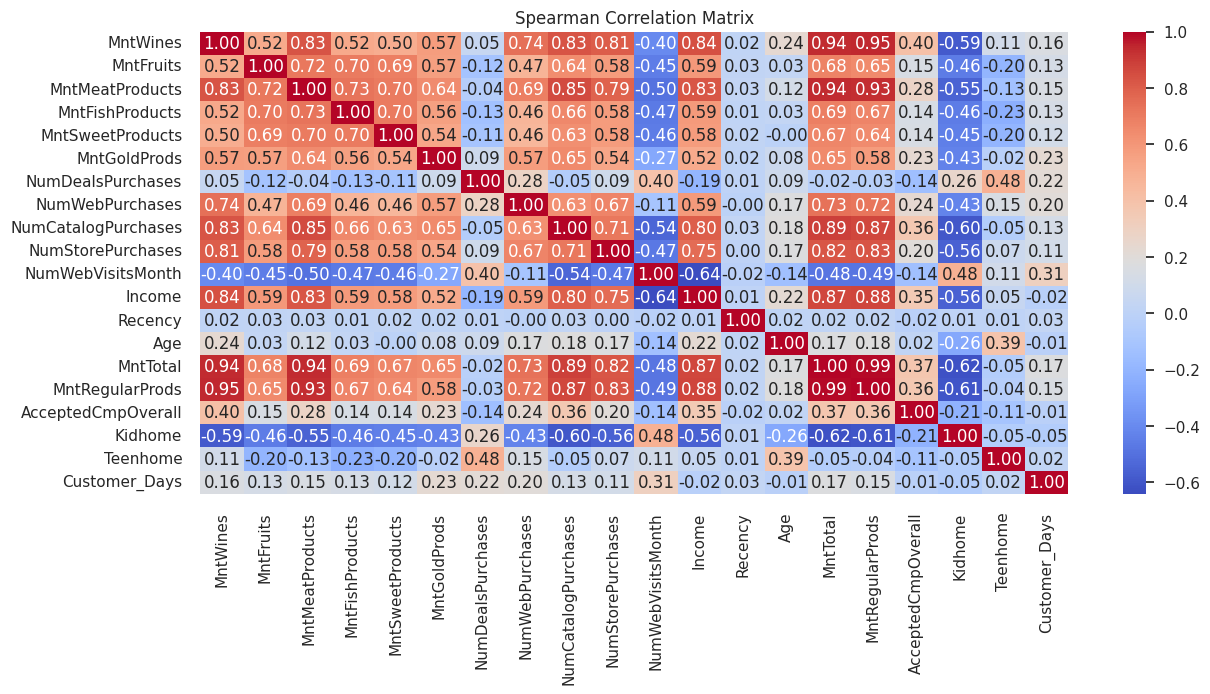

In [62]:
spearman_corr = df_numerical.corr(method='spearman')

# Criar o heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


In [63]:
df_numerical.columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Income', 'Recency', 'Age', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'Kidhome', 'Teenhome',
       'Customer_Days'],
      dtype='object')

### Correlation Evaluation ###

In [64]:
import scipy
from scipy import stats

def calculate_correlation_table(list1, mnt_total_column, df):
    # List to store the correlation test results
    correlation_results_list = []

    # Perform the Spearman correlation test for each column
    for column in list1:
        # Execute the Spearman correlation test
        spearman_corr, p_value = scipy.stats.spearmanr(df[mnt_total_column], df[column])

        # Add the results to the list
        correlation_results_list.append({
            'Column': column,
            'Spearman_Correlation': spearman_corr,
            'P-value': p_value
        })

    # Create a DataFrame from the results list
    correlation_results = pd.DataFrame(correlation_results_list)

    # Define the limits for the different levels of correlation
    strong_limit = 0.7
    moderate_limit = 0.5

    # Function to determine the correlation strength
    def correlation_strength(corr):
        if abs(corr) >= strong_limit:
            return 'Strong correlation'
        elif abs(corr) >= moderate_limit:
            return 'Moderate correlation'
        else:
            return 'Weak correlation'

    # Add a new column indicating the correlation strength
    correlation_results['Correlation Strength'] = correlation_results['Spearman_Correlation'].apply(correlation_strength)

    # Sort the DataFrame based on the 'Correlation Strength' column
    correlation_results_sorted = correlation_results.sort_values(by='Correlation Strength',
                                                                 key=lambda s: s.apply(['Strong correlation', 'Moderate correlation', 'Weak correlation'].index),
                                                                 ignore_index=True)

    return correlation_results_sorted


In [65]:
list_MntTotal = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
         'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
         'NumWebVisitsMonth', 'Income', 'Recency', 'Age',
         'MntRegularProds', 'AcceptedCmpOverall', 'Kidhome', 'Teenhome','Customer_Days']

# Call the function to calculate the correlation table
corr_MntTotal = calculate_correlation_table(list_MntTotal, 'MntTotal', df)

# Display the correlation table
corr_MntTotal

Column  Spearman_Correlation        P-value  \
0              MntWines              0.940911   0.000000e+00   
1       MntRegularProds              0.991683   0.000000e+00   
2                Income              0.869619   0.000000e+00   
3   NumCatalogPurchases              0.886116   0.000000e+00   
4       NumWebPurchases              0.733359   0.000000e+00   
5     NumStorePurchases              0.821681   0.000000e+00   
6       MntMeatProducts              0.942274   0.000000e+00   
7      MntSweetProducts              0.665465  3.986951e-282   
8       MntFishProducts              0.691333  2.872338e-313   
9             MntFruits              0.676773  2.400249e-295   
10              Kidhome             -0.615871  2.003211e-230   
11         MntGoldProds              0.650687  1.060028e-265   
12    NumDealsPurchases             -0.020632   3.328594e-01   
13             Teenhome             -0.050394   1.795574e-02   
14    NumWebVisitsMonth             -0.482538  5.578088e-129   
15              Recency              0.021728   3.078016e-01   
16                  Age              0.170224   8.447641e-16   
17   AcceptedCmpOverall              0.374208   3.078636e-74   
18        Customer_Days              0.172102   4.029761e-16   

    Correlation Strength  
0     Strong correlation  
1     Strong correlation  
2     Strong correlation  
3     Strong correlation  
4     Strong correlation  
5     Strong correlation  
6     Strong correlation  
7   Moderate correlation  
8   Moderate correlation  
9   Moderate correlation  
10  Moderate correlation  
11  Moderate correlation  
12      Weak correlation  
13      Weak correlation  
14      Weak correlation  
15      Weak correlation  
16      Weak correlation  
17      Weak correlation  
18      Weak correlation

### Scatter Plots ###

In [66]:
def scatter_plot_num_x_num_list(num_tgt, list_of_numerical):
  plt.figure(figsize=(16, 16))  # Ajuste o tamanho conforme necessário
  sns.set(style="whitegrid")

  num_features = df[list_of_numerical]
  num_target = df[num_tgt]

  # Calcula a média de todas as colunas numéricas uma única vez

  for i, feature in enumerate(num_features, 1):
      plt.subplot(7, 3, i)  # Ajuste para a quantidade correta de subplots, 3 linhas e até 7 colunas aqui
      sns.scatterplot(x=num_features[feature],y=num_target, color='#EA0031')

      if i == 1:
          plt.legend(loc="upper left")

  plt.tight_layout()

  plt.show()

#### MntTotal x Most correlated numerical variables ####

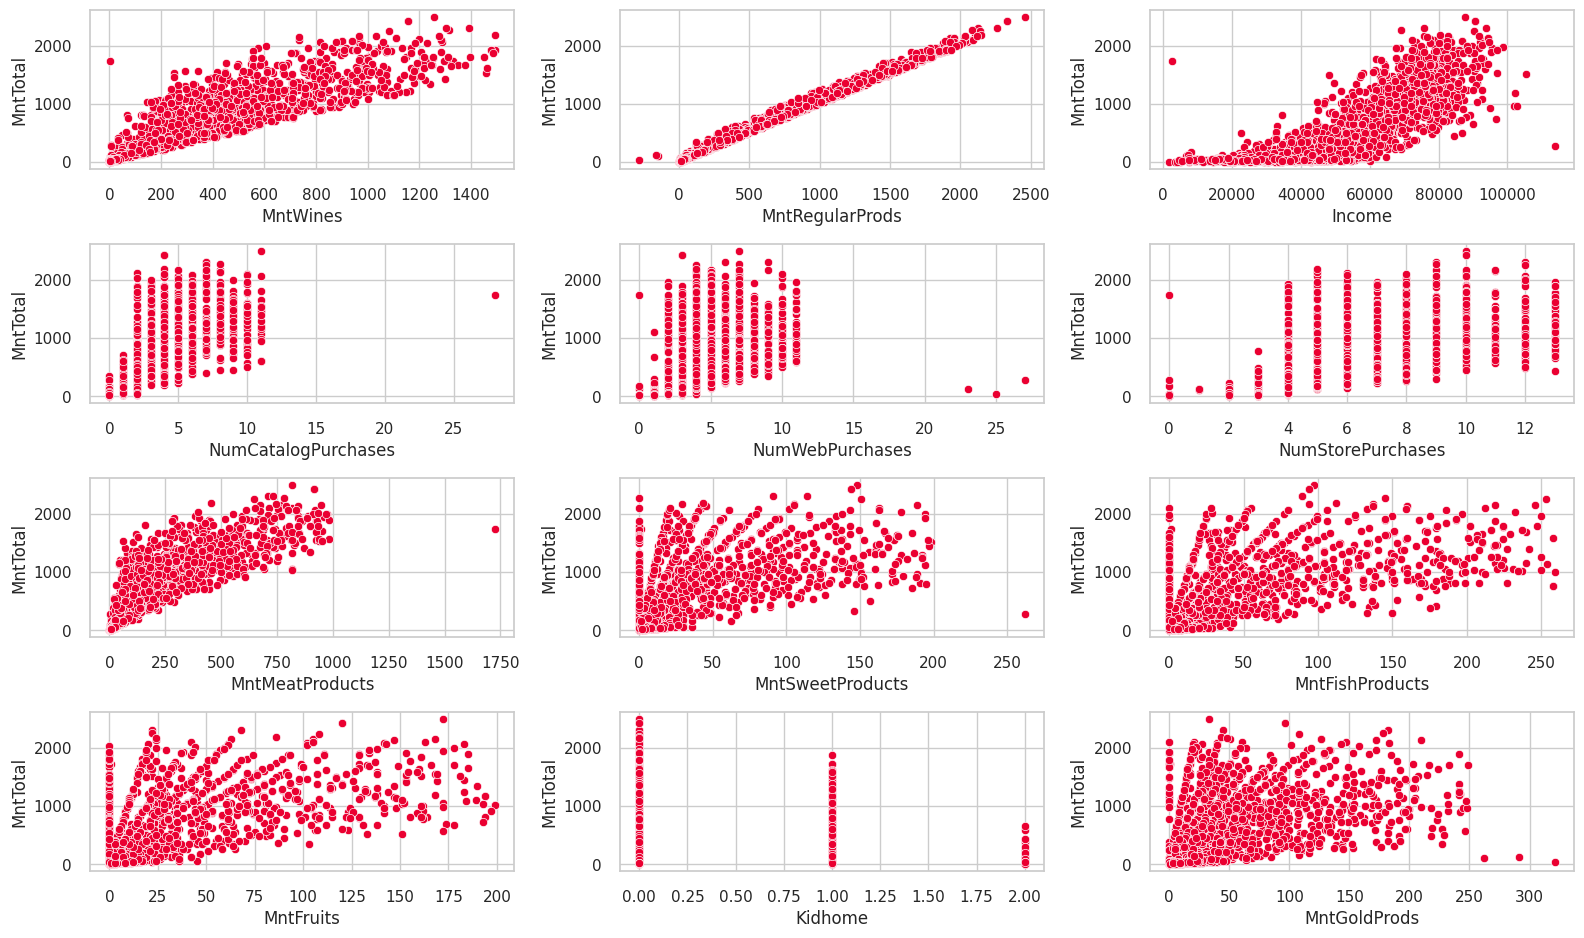

In [67]:
list_MntTotal = corr_MntTotal[(corr_MntTotal['Correlation Strength'] == 'Moderate correlation')
            | (corr_MntTotal['Correlation Strength'] == 'Strong correlation')]['Column'].tolist()

scatter_plot_num_x_num_list('MntTotal', list_of_numerical=list_MntTotal)

#### MntRegularProds x Most correlated numerical variables ####

In [68]:
list_MntRegularProds = [coluna for coluna in colunas_numericas if coluna != 'MntRegularProds']

# Call the function to calculate the correlation table
corr_MntRegularProds = calculate_correlation_table(list_MntRegularProds, 'MntRegularProds', df)

# Display the correlation table
corr_MntRegularProds

Column  Spearman_Correlation        P-value  \
0              MntWines              0.945521   0.000000e+00   
1              MntTotal              0.991683   0.000000e+00   
2                Income              0.877901   0.000000e+00   
3   NumCatalogPurchases              0.866076   0.000000e+00   
4       NumWebPurchases              0.722606   0.000000e+00   
5     NumStorePurchases              0.829356   0.000000e+00   
6       MntMeatProducts              0.934259   0.000000e+00   
7      MntSweetProducts              0.644479  4.513608e-259   
8       MntFishProducts              0.669676  5.572819e-287   
9             MntFruits              0.652686  7.210644e-268   
10              Kidhome             -0.608293  2.534531e-223   
11         MntGoldProds              0.580032  1.860740e-198   
12    NumDealsPurchases             -0.026494   2.136404e-01   
13             Teenhome             -0.036418   8.732617e-02   
14    NumWebVisitsMonth             -0.485005  1.792459e-130   
15              Recency              0.020760   3.298673e-01   
16                  Age              0.182010   7.061531e-18   
17   AcceptedCmpOverall              0.361203   6.228768e-69   
18        Customer_Days              0.153636   4.065358e-13   

    Correlation Strength  
0     Strong correlation  
1     Strong correlation  
2     Strong correlation  
3     Strong correlation  
4     Strong correlation  
5     Strong correlation  
6     Strong correlation  
7   Moderate correlation  
8   Moderate correlation  
9   Moderate correlation  
10  Moderate correlation  
11  Moderate correlation  
12      Weak correlation  
13      Weak correlation  
14      Weak correlation  
15      Weak correlation  
16      Weak correlation  
17      Weak correlation  
18      Weak correlation

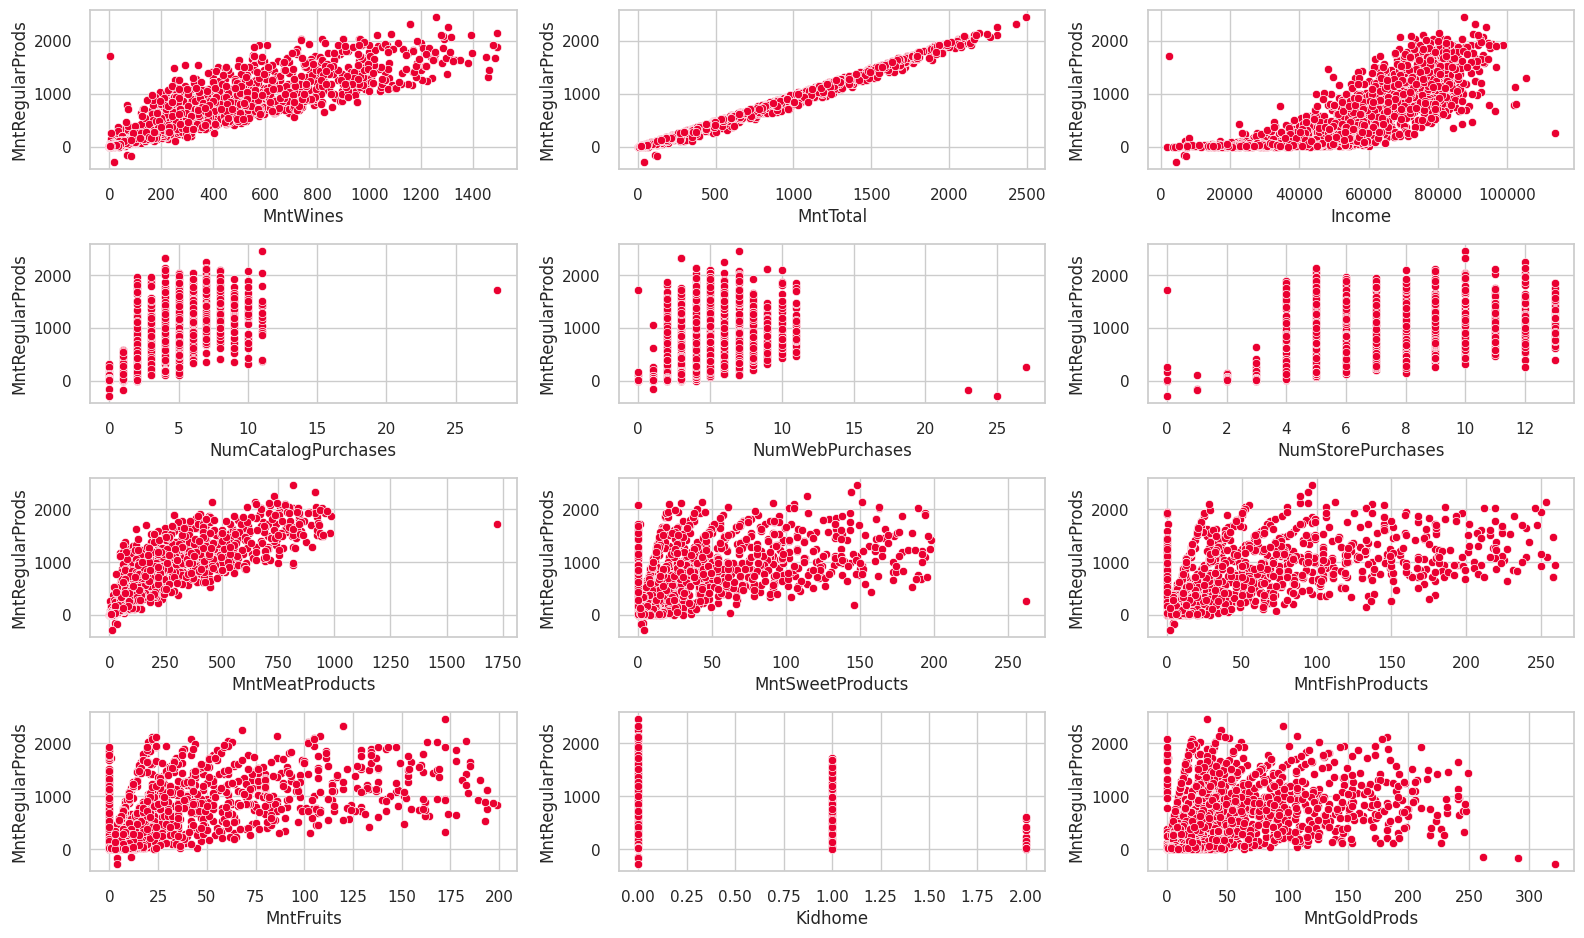

In [69]:
list_MntRegularProds = corr_MntRegularProds[(corr_MntRegularProds['Correlation Strength'] == 'Moderate correlation')
            | (corr_MntRegularProds['Correlation Strength'] == 'Strong correlation')]['Column'].tolist()

scatter_plot_num_x_num_list('MntRegularProds', list_of_numerical=list_MntRegularProds)

In [70]:
list_MntRegularProds = corr_MntRegularProds[(corr_MntRegularProds['Correlation Strength'] == 'Moderate correlation')
            | (corr_MntRegularProds['Correlation Strength'] == 'Strong correlation')]['Column'].tolist()

lista2 = [coluna for coluna in list_MntRegularProds if coluna != 'MntTotal']

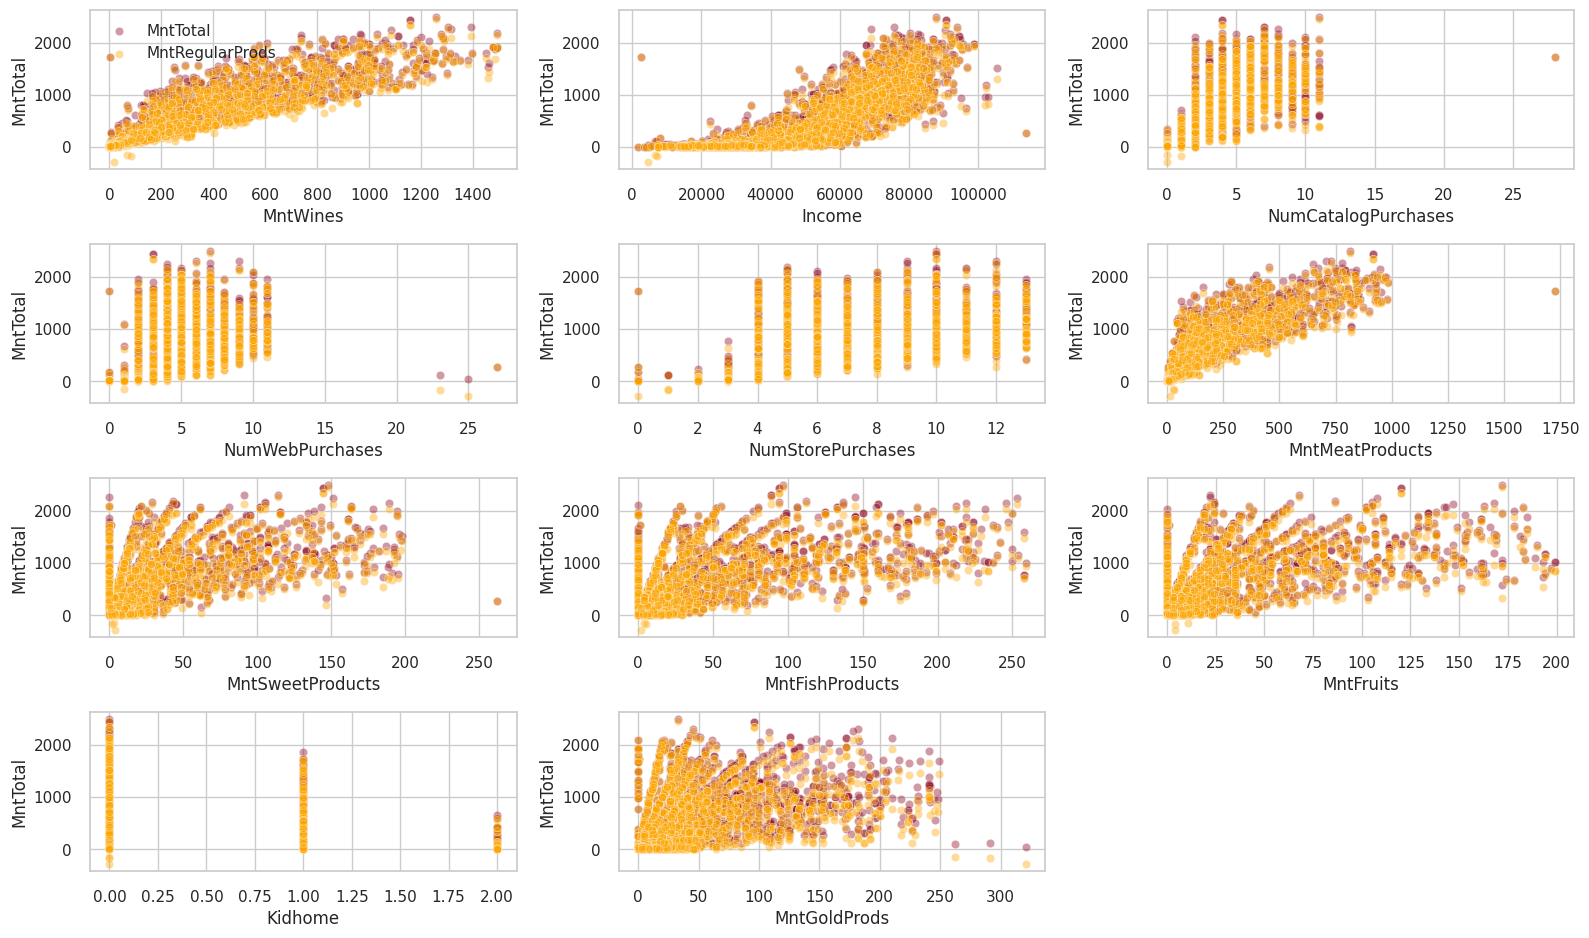

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_num_LISTAx_num_list(target_cols, list_of_numerical):
    plt.figure(figsize=(16, 16))  # Ajuste o tamanho conforme necessário
    sns.set(style="whitegrid")

    num_features = df[list_of_numerical]
    colors = ['#8A011B', '#FEA500']

    # Calcula a média de todas as colunas numéricas uma única vez
    for i, feature in enumerate(num_features, 1):
        plt.subplot(7, 3, i)  # Ajuste para a quantidade correta de subplots, 7 linhas e 3 colunas aqui

        # Scatter plot para as colunas alvo e as colunas numéricas especificadas
        for j, target_col in enumerate(target_cols):
            sns.scatterplot(x=num_features[feature], y=df[target_col], color=colors[j], alpha=0.4)

        if i == 1:
            plt.legend(target_cols, loc="upper left")

    plt.tight_layout()
    plt.show()

# Exemplo de uso:
scatter_plot_num_LISTAx_num_list(['MntTotal', 'MntRegularProds'], lista2)


In [72]:
def plots_strong_moderate_corr(column, df):
  colunas_numericas = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Income', 'Recency',
                   'Age', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Kidhome', 'Teenhome','Customer_Days']

  lista = [coluna for coluna in colunas_numericas if coluna != column]

  # Call the function to calculate the correlation table
  corr_table = calculate_correlation_table(lista, column, df)

  list_strong_moderate = corr_table[(corr_table['Correlation Strength'] == 'Moderate correlation')
            | (corr_table['Correlation Strength'] == 'Strong correlation')]['Column'].tolist()


  return scatter_plot_num_x_num_list(column, list_of_numerical=list_strong_moderate)

#### Income x Most correlated numerical variables ####

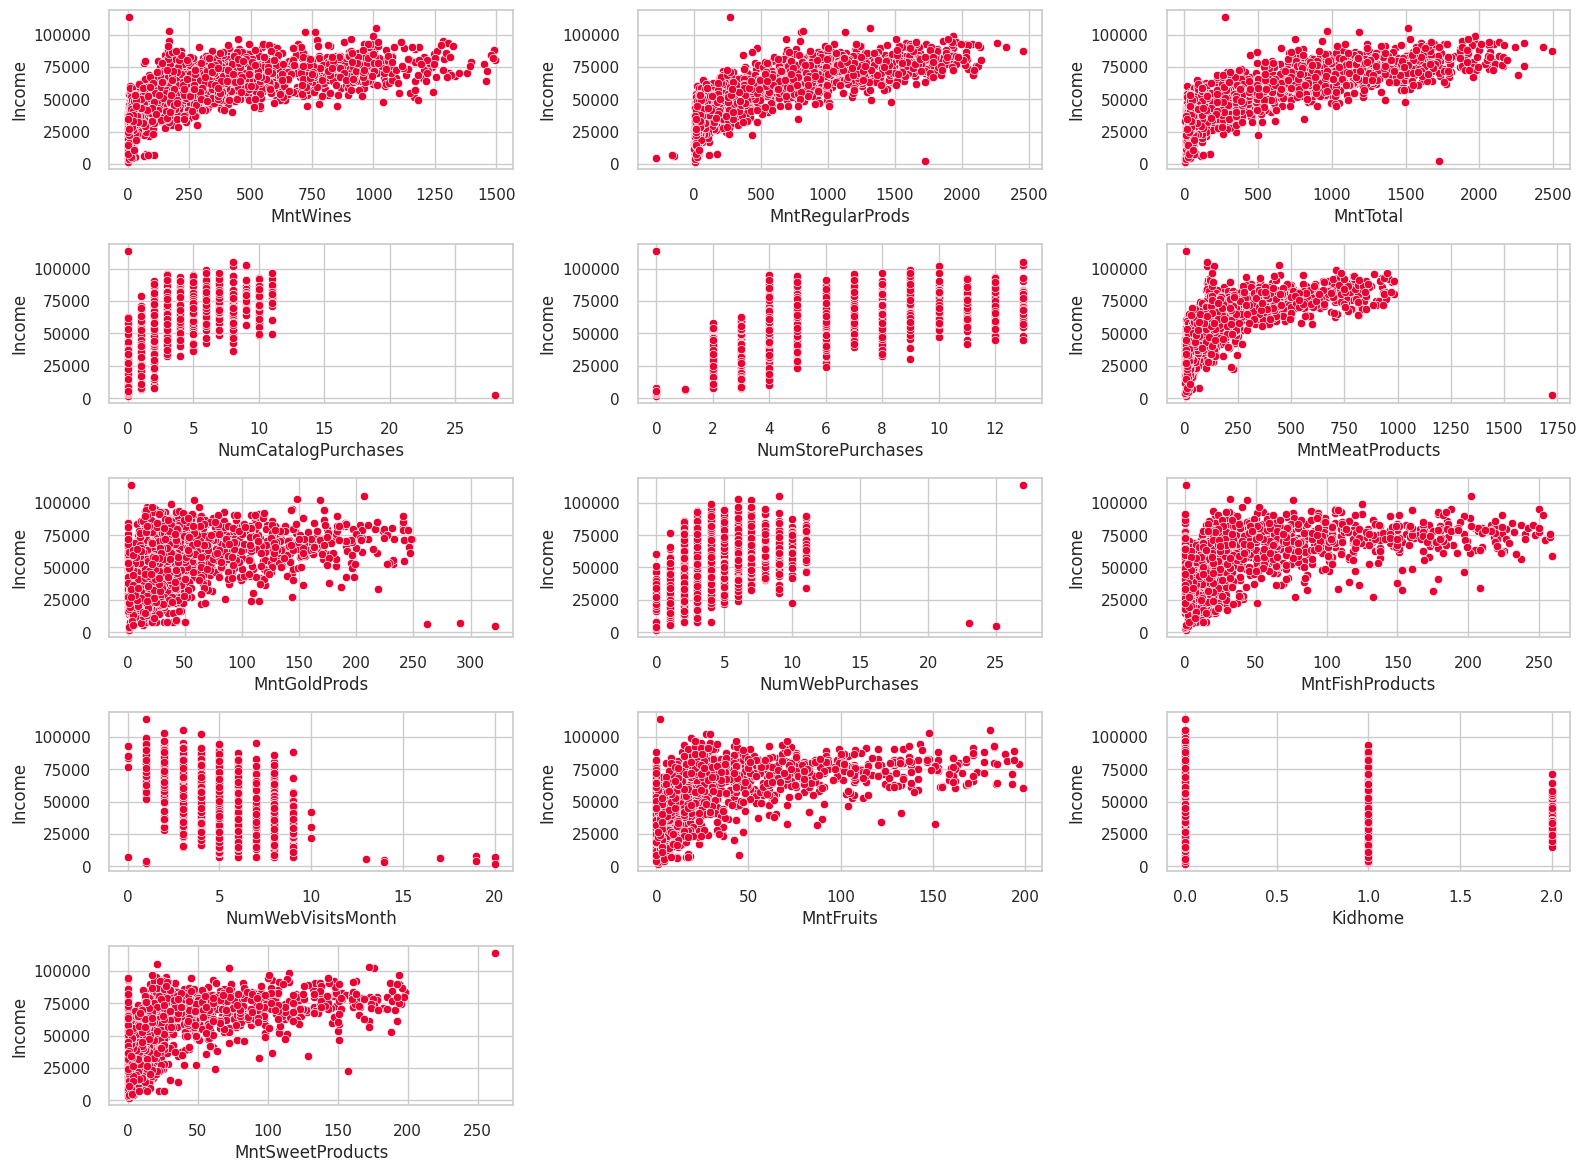

In [73]:
plots_strong_moderate_corr('Income', df)

In [74]:
list_Income = [coluna for coluna in colunas_numericas if coluna != 'Income']

corr_Income = calculate_correlation_table(list_Income , 'Income', df)

corr_Income

Column  Spearman_Correlation        P-value  \
0              MntWines              0.843936   0.000000e+00   
1       MntRegularProds              0.877901   0.000000e+00   
2              MntTotal              0.869619   0.000000e+00   
3   NumCatalogPurchases              0.799899   0.000000e+00   
4     NumStorePurchases              0.751101   0.000000e+00   
5       MntMeatProducts              0.826107   0.000000e+00   
6          MntGoldProds              0.518682  3.977082e-152   
7       NumWebPurchases              0.588819  6.318958e-206   
8       MntFishProducts              0.586938  2.626431e-204   
9     NumWebVisitsMonth             -0.640635  4.801097e-255   
10            MntFruits              0.591371  3.880561e-208   
11              Kidhome             -0.562800  1.877203e-184   
12     MntSweetProducts              0.578222  6.023469e-197   
13    NumDealsPurchases             -0.194158   3.589984e-20   
14             Teenhome              0.049434   2.026654e-02   
15              Recency              0.009235   6.647050e-01   
16                  Age              0.220735   9.712803e-26   
17   AcceptedCmpOverall              0.346822   2.405283e-63   
18        Customer_Days             -0.022885   2.827579e-01   

    Correlation Strength  
0     Strong correlation  
1     Strong correlation  
2     Strong correlation  
3     Strong correlation  
4     Strong correlation  
5     Strong correlation  
6   Moderate correlation  
7   Moderate correlation  
8   Moderate correlation  
9   Moderate correlation  
10  Moderate correlation  
11  Moderate correlation  
12  Moderate correlation  
13      Weak correlation  
14      Weak correlation  
15      Weak correlation  
16      Weak correlation  
17      Weak correlation  
18      Weak correlation

#### NumCatalogPurchases x Most correlated numerical variables ####

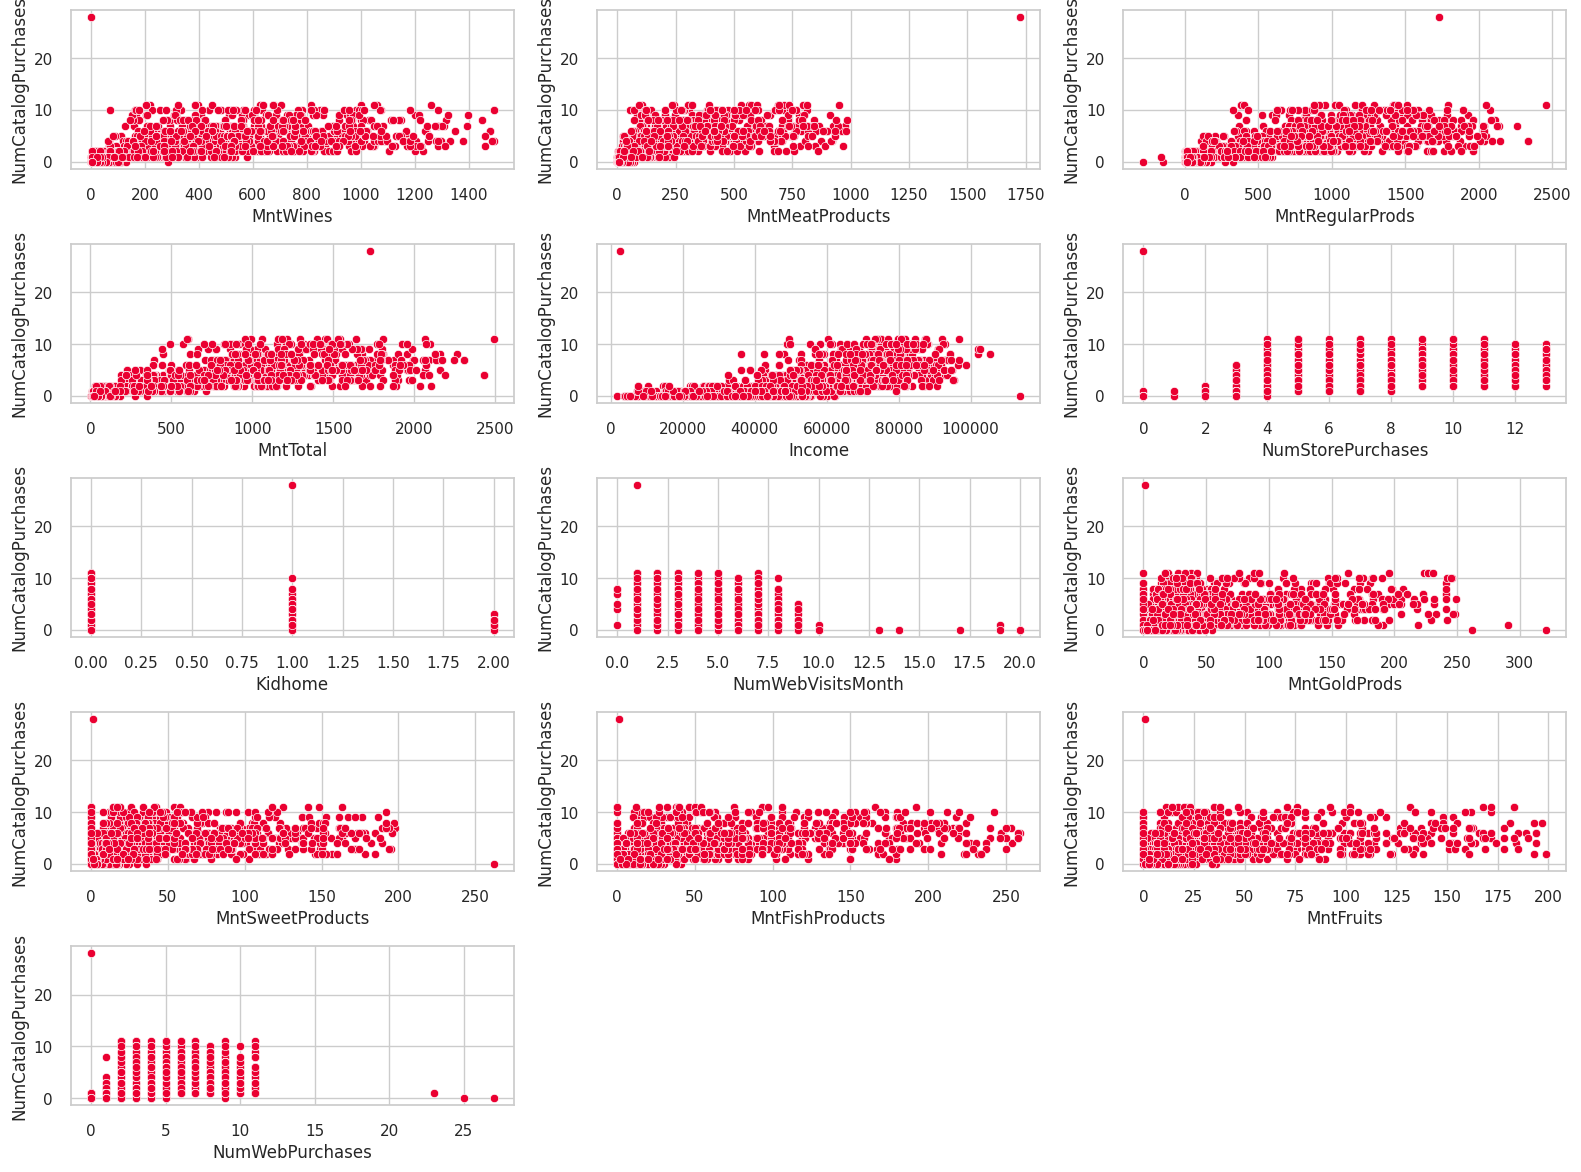

In [75]:
plots_strong_moderate_corr('NumCatalogPurchases', df)

#### MntWines x Most correlated numerical variables ####

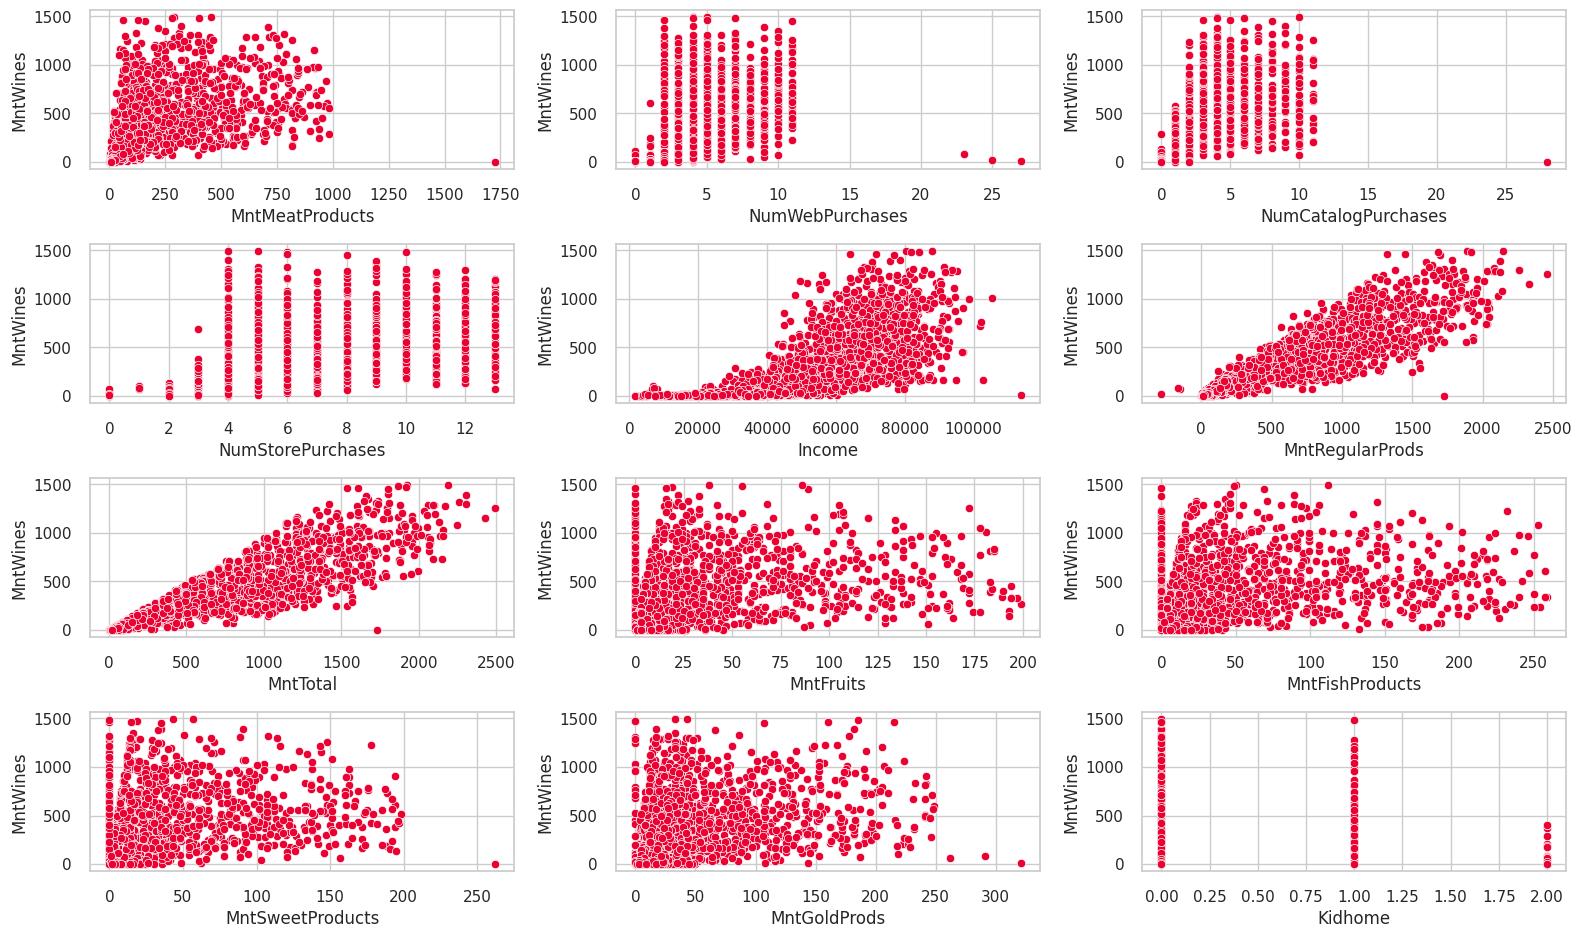

In [76]:
plots_strong_moderate_corr('MntWines', df)

#### MntMeatProducts x Most correlated numerical variables ####

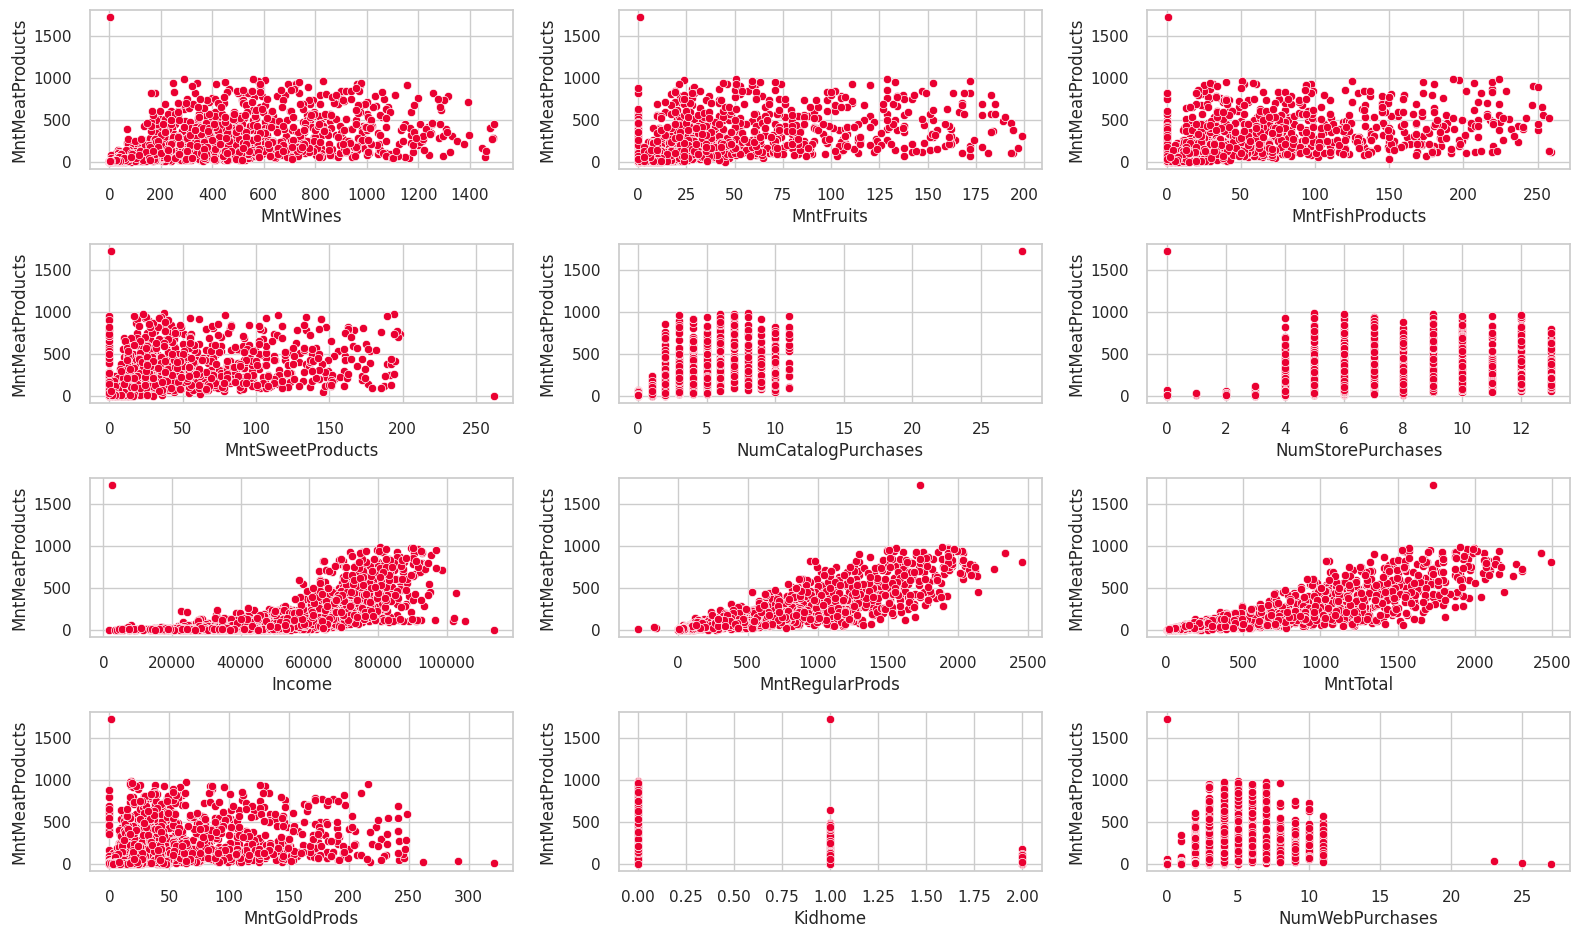

In [77]:
plots_strong_moderate_corr('MntMeatProducts', df)